In [346]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor


In [347]:
# pip install xgboost

In [348]:

df = pd.read_csv('Airbnb_Open_Data.csv')
df


/var/folders/qc/l6mtftrs1k923kl43rx_fy9r0000gn/T/ipykernel_9231/1370412572.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [349]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [351]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [352]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [353]:
index= ['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license']

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

id
6044940     2
6067584     2
6077525     2
6076973     2
6076421     2
           ..
19804390    1
19803837    1
19803285    1
19802733    1
57367417    1
Name: count, Length: 102058, dtype: int64 

---------------------------------------------------------------
NAME
Home away from home                               33
Hillside Hotel                                    30
Water View King Bed Hotel Room                    30
New york Multi-unit building                      27
Brooklyn Apartment                                27
                                                  ..
♂ ♀ Sunny Bedroom in Popular Brooklyn              1
♂ ♀ Large Room Close to Express Subway + Bus       1
Clean room in Soho/Nolita                          1
♂ ♀ Large Sunny Bedroom Walk to Express Subway     1
Parisian Style Apartment in Heart of Brooklyn      1
Name: count, Length: 61281, dtype: int64 

---------------------------------------------------------------
host id
38729751923    2
3895711649     

In [354]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(102058, 26)

In [355]:
missing_values = df.isnull().sum()
missing_values

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [356]:
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME','service fee']
df = df.drop(columns=columns_to_drop)

In [357]:
# For columns with numerical data, we can consider filling missing values with the median or mean
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [358]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                       'country', 'country code', 'instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [359]:
# Removing rows with missing 'price'
df = df.dropna(subset=['price'])

In [360]:
# Interpolating 'lat' and 'long' based on 'neighbourhood'
# Grouping by 'neighbourhood' and calculating the mean 'lat' and 'long'
mean_coords = df.groupby('neighbourhood')[['lat', 'long']].mean()

# Applying the mean coordinates to missing values
df = df.set_index('neighbourhood')
df['lat'].fillna(mean_coords['lat'], inplace=True)
df['long'].fillna(mean_coords['long'], inplace=True)
df.reset_index(inplace=True)

In [361]:
# Remove dollar signs, commas, and trailing spaces, then convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).str.strip().astype(float)

In [362]:
# Checking the dataset after handling missing values
df.isnull().sum(), df.shape

(neighbourhood                     0
 host_identity_verified            0
 neighbourhood group               0
 lat                               0
 long                              0
 country                           0
 country code                      0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (101811, 19))

In [363]:
# Checking the dataset after handling missing values
df.isnull().sum(), df.shape

(neighbourhood                     0
 host_identity_verified            0
 neighbourhood group               0
 lat                               0
 long                              0
 country                           0
 country code                      0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (101811, 19))

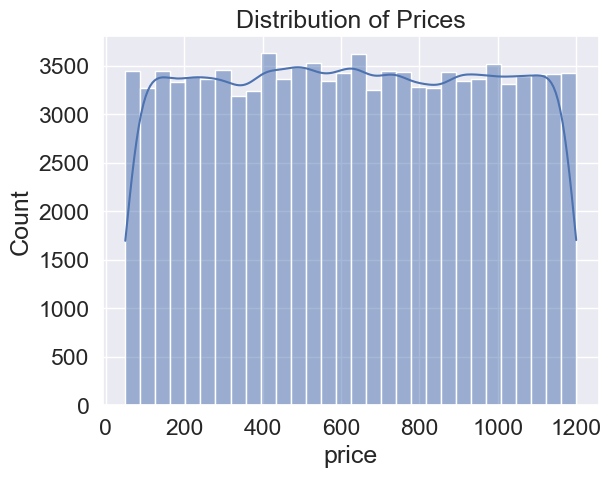

In [364]:


sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()




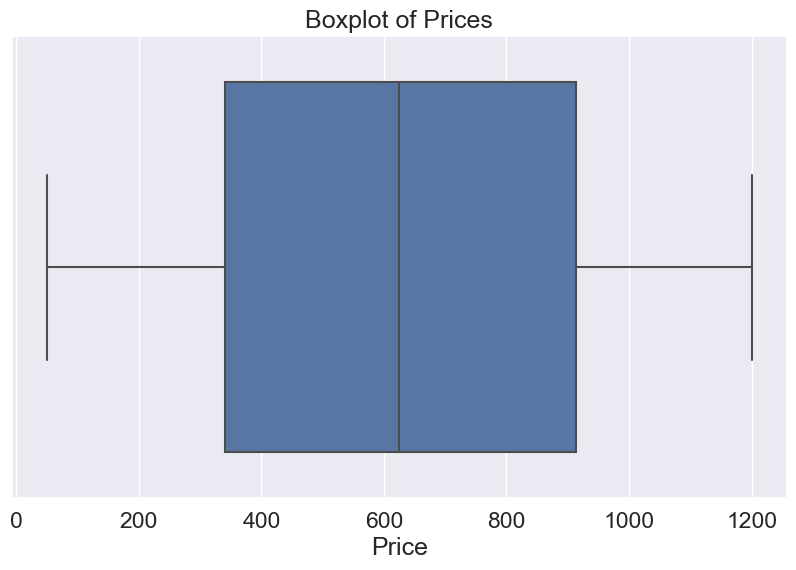

In [365]:
# Boxplot for Prices (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

/Users/akkothari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


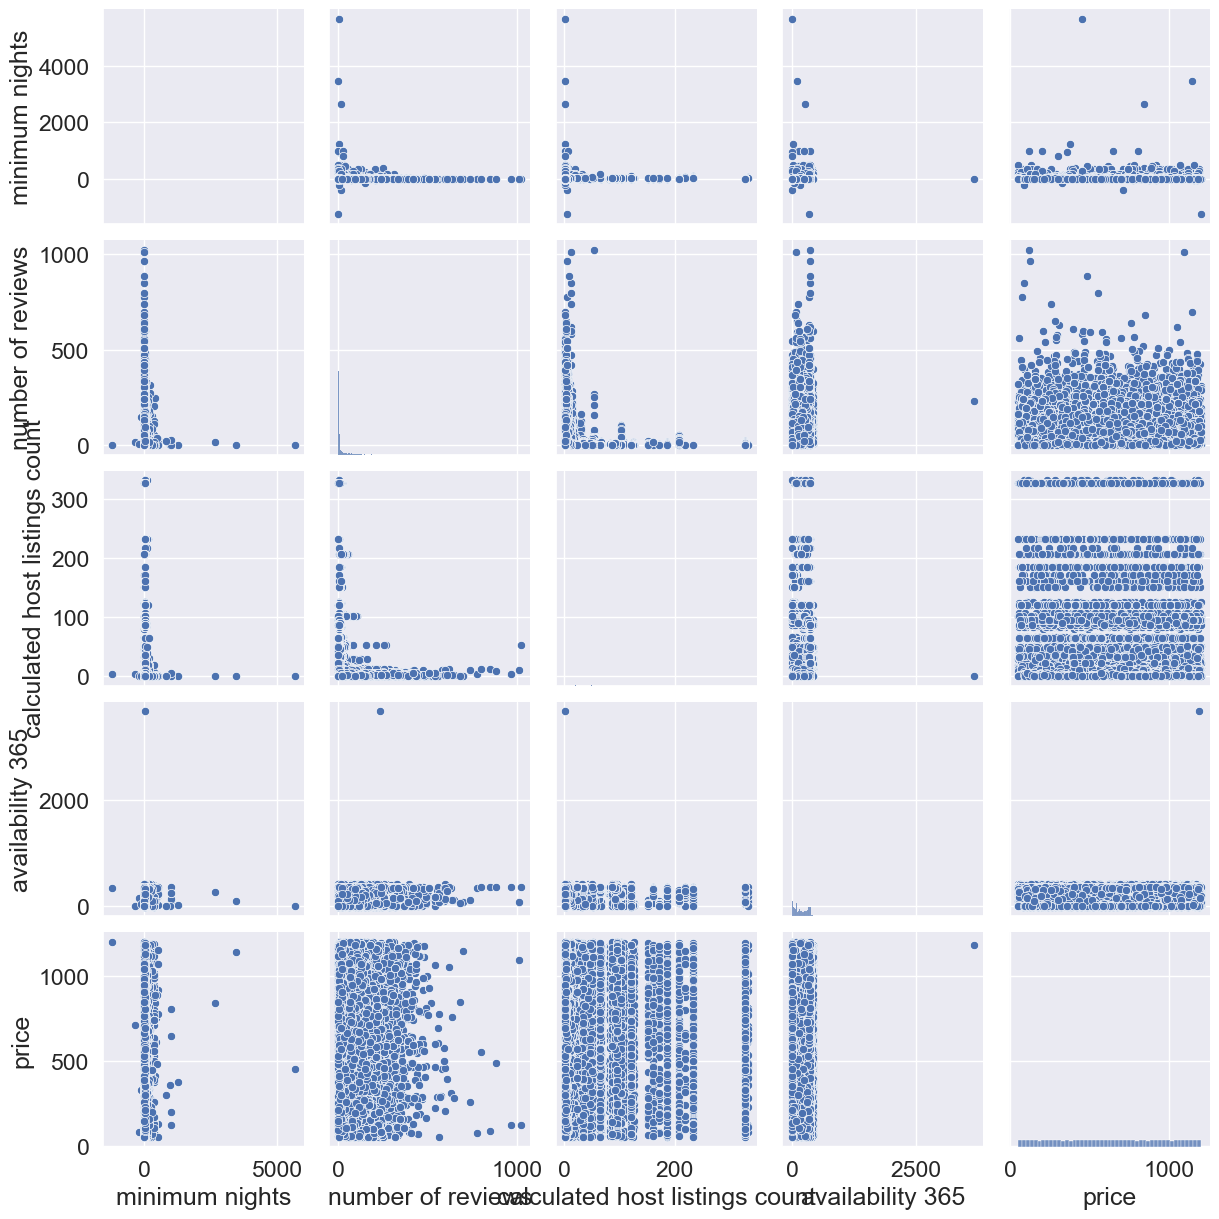

In [366]:
# Visualize relationships between numerical features and the target variable
sns.pairplot(df[['minimum nights', 'number of reviews', 'calculated host listings count', 'availability 365', 'price']])
plt.show()



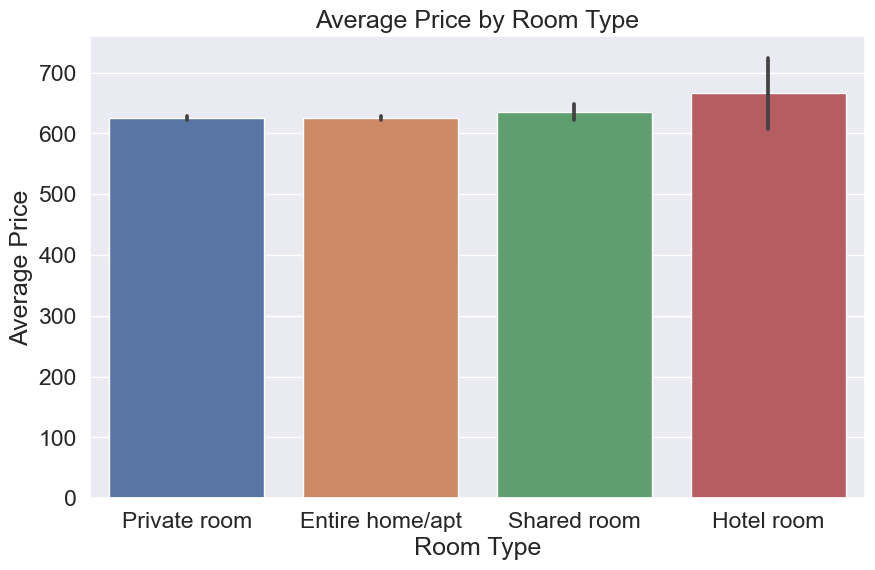

In [367]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

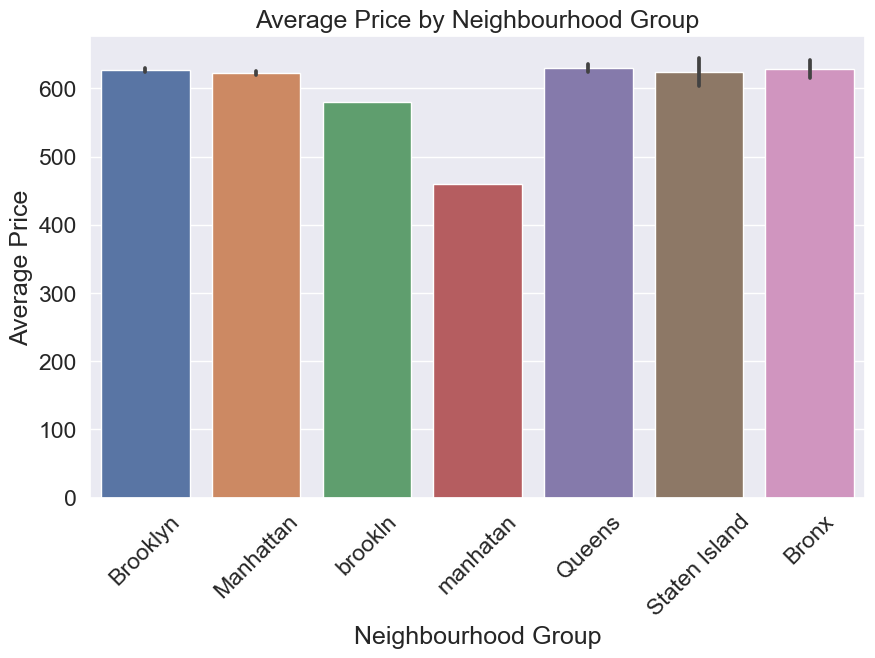

In [368]:
# Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [369]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

In [370]:
df['last review'].fillna(method="ffill",inplace=True)

KeyError: 'last review'

In [371]:
# Creating new features
#'price_per_night' - price divided by minimum nights (if minimum nights is 0, set to 1 to avoid division by zero)
df['minimum nights'] = df['minimum nights'].replace(0, 1)
df['price_per_night'] = df['price'] / df['minimum nights']

In [372]:
df.columns

Index(['neighbourhood', 'host_identity_verified', 'neighbourhood group', 'lat',
       'long', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'price_per_night'],
      dtype='object')

/var/folders/qc/l6mtftrs1k923kl43rx_fy9r0000gn/T/ipykernel_9231/1441518634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["review rate number"])


<Axes: xlabel='review rate number', ylabel='Density'>

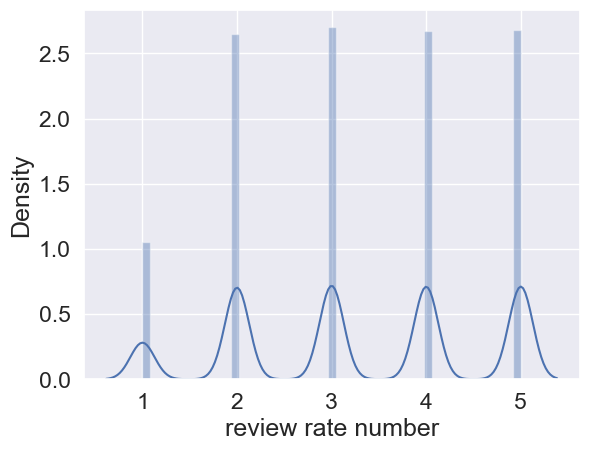

In [373]:
sns.distplot(df["review rate number"])

In [374]:
df["review rate number"] = df["review rate number"].fillna(0)

In [375]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

/var/folders/qc/l6mtftrs1k923kl43rx_fy9r0000gn/T/ipykernel_9231/1377778346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


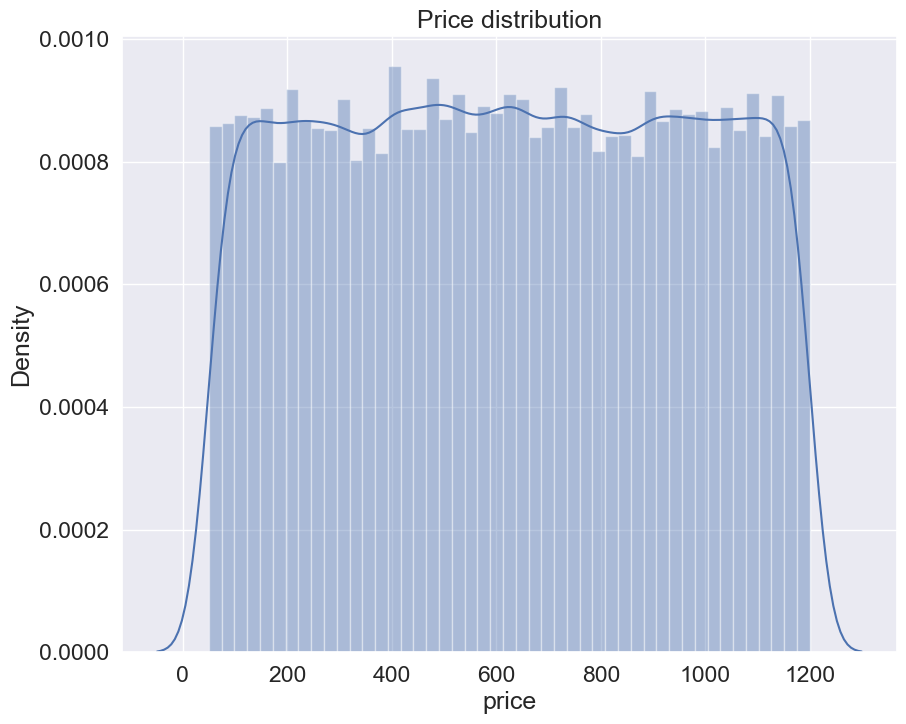

In [376]:
plt.figure(figsize = (10, 8))
sns.distplot(df["price"])
plt.title('Price distribution')
plt.show()

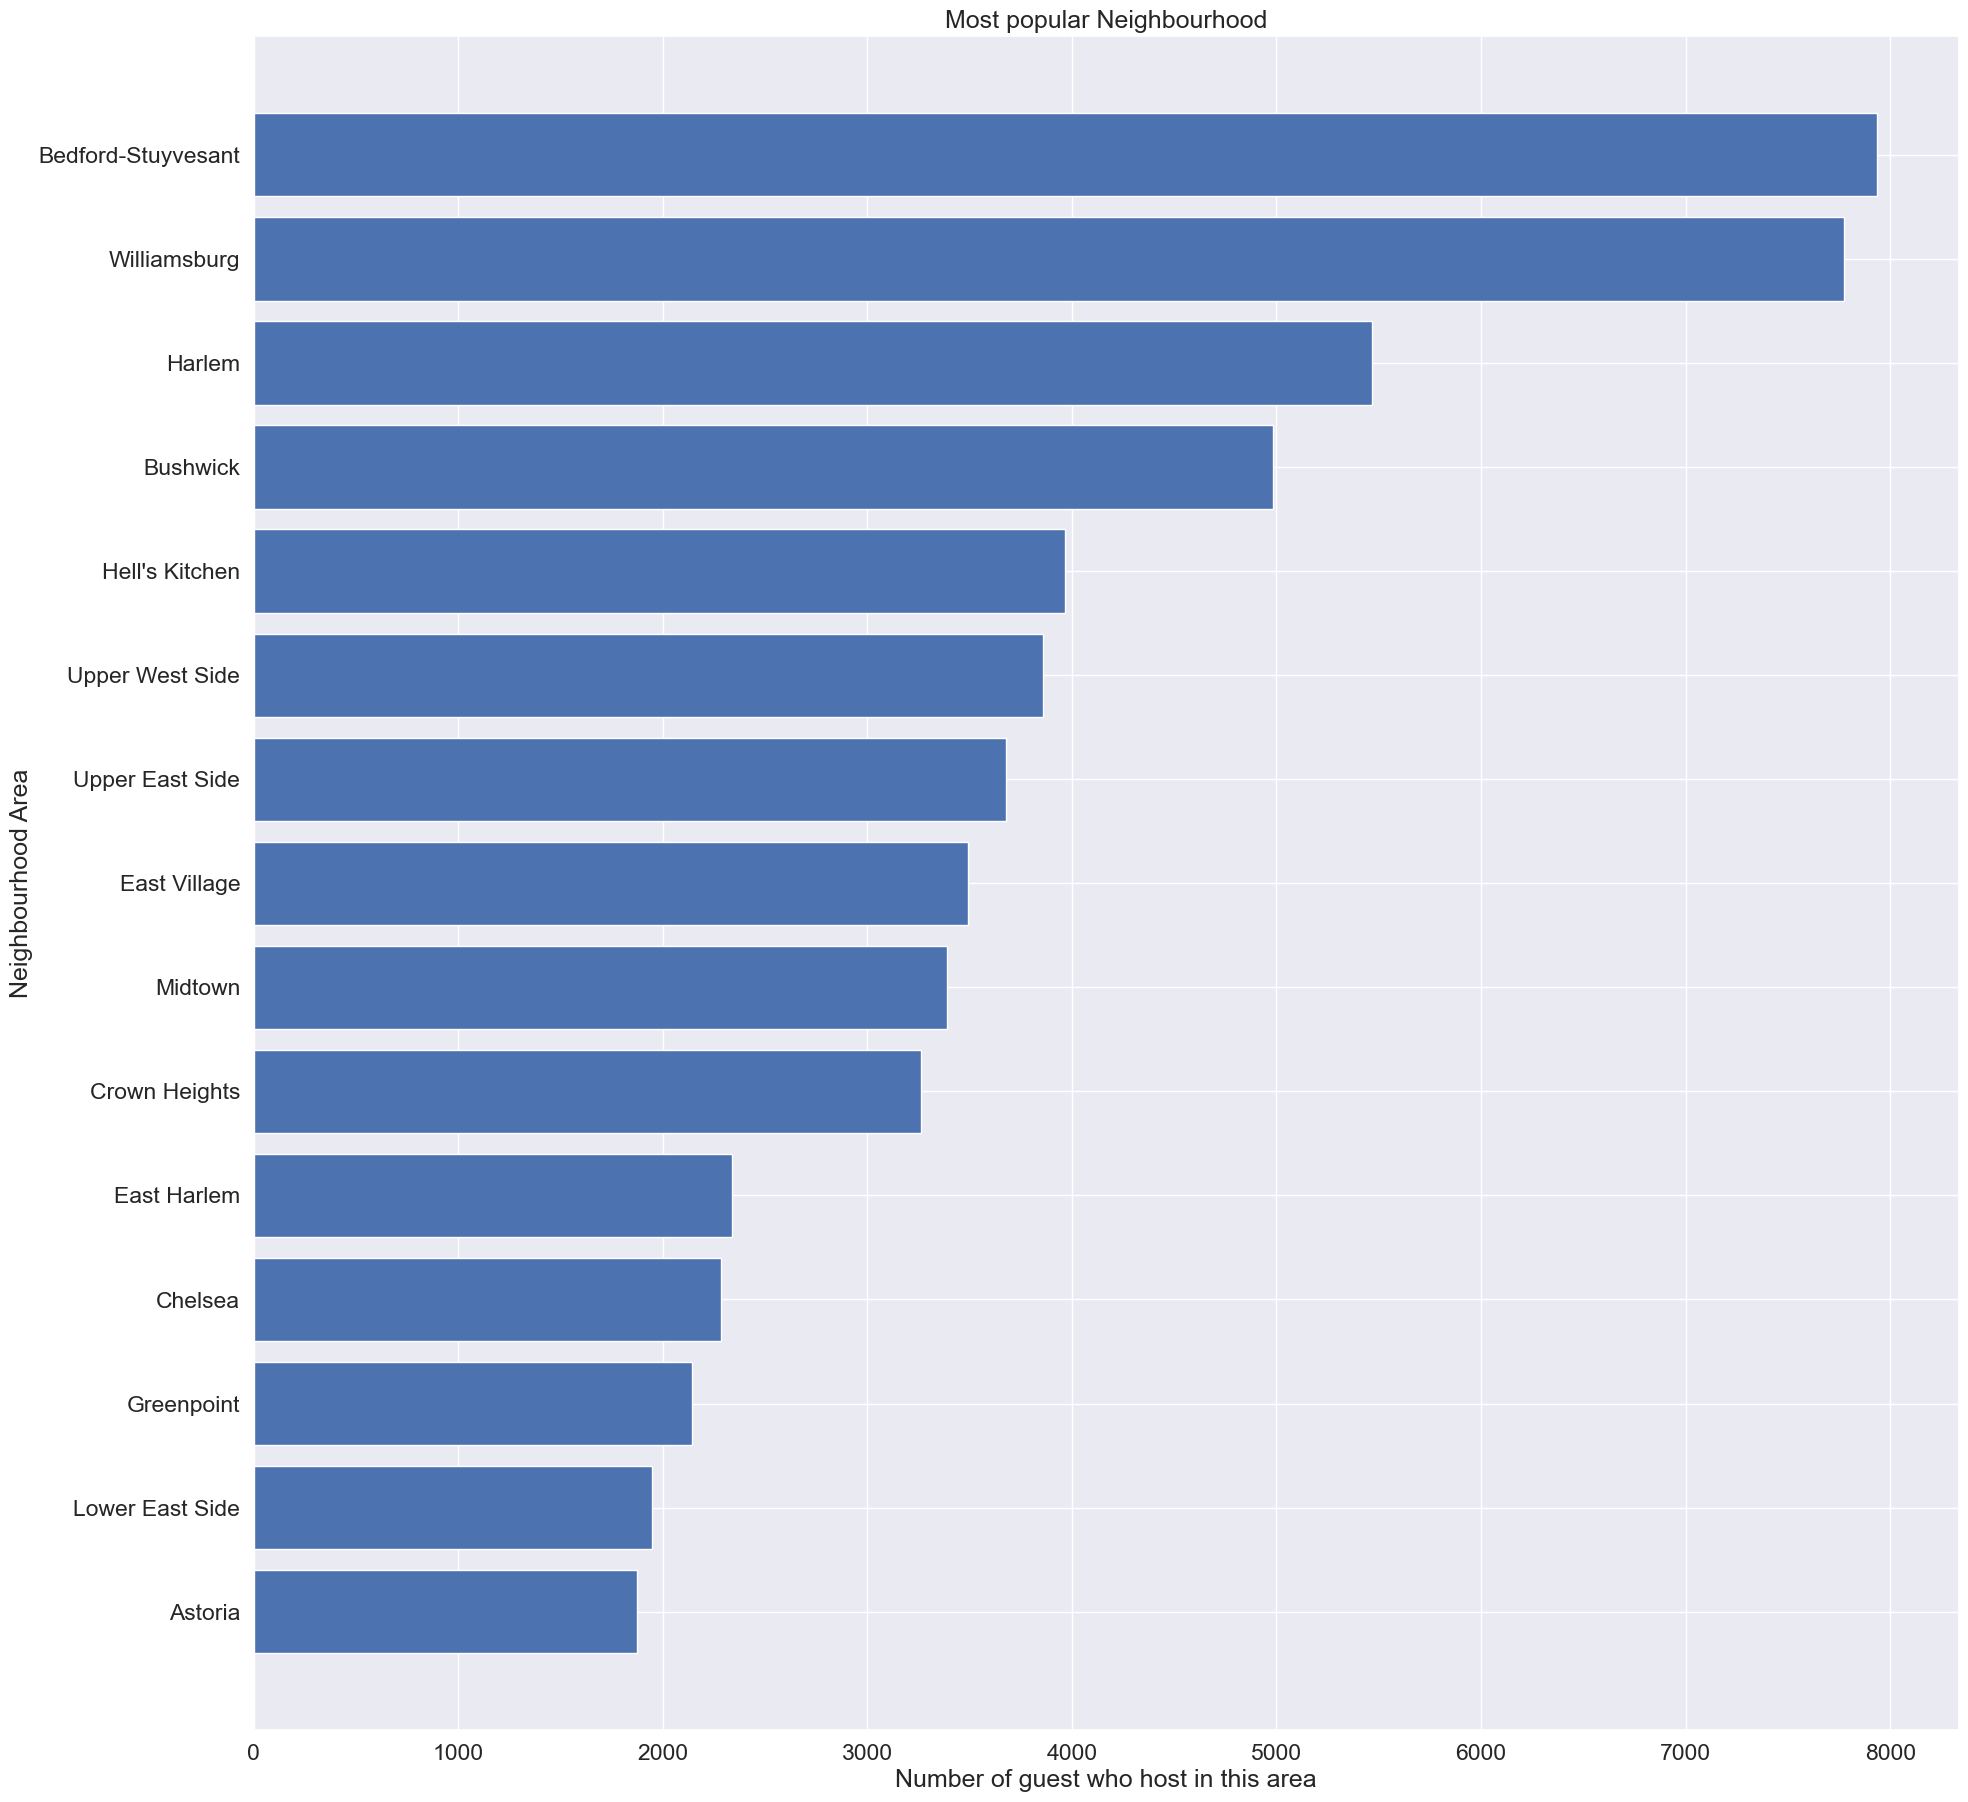

In [377]:
df1 = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

/Users/akkothari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


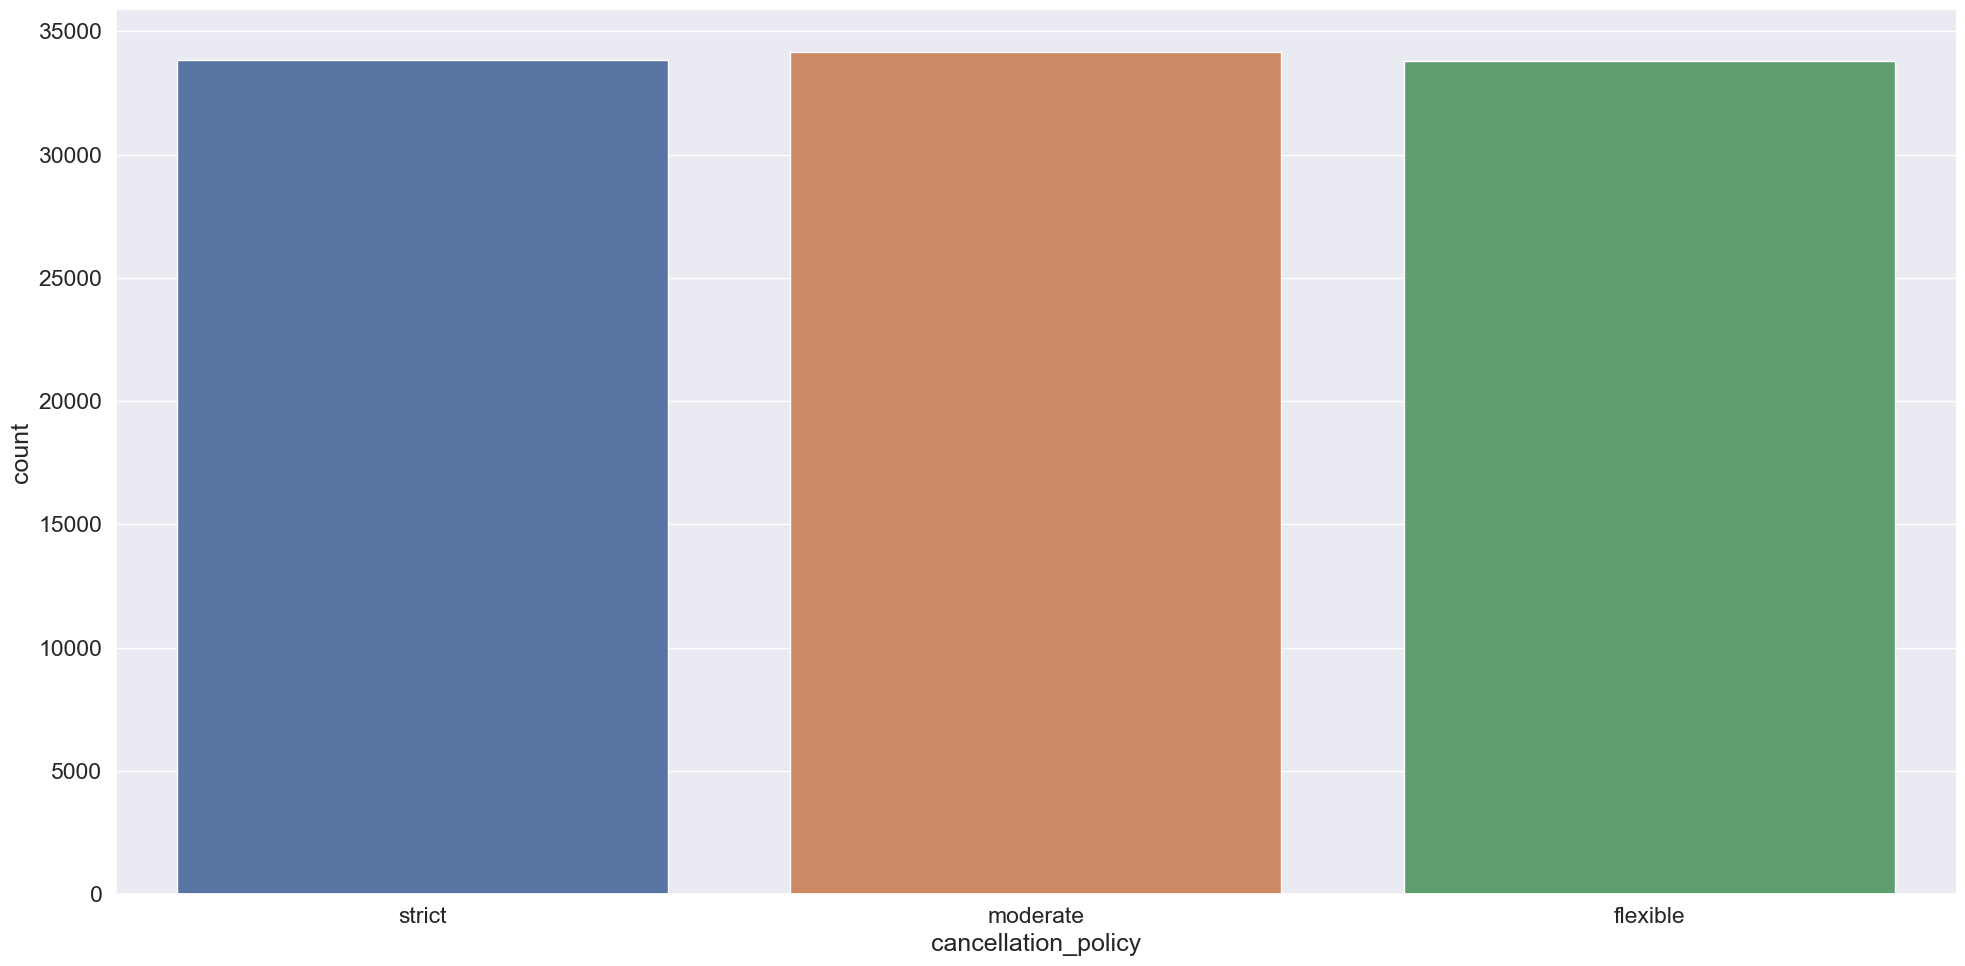

In [378]:
plot_catplot("cancellation_policy" , "count",10, 2)

/Users/akkothari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


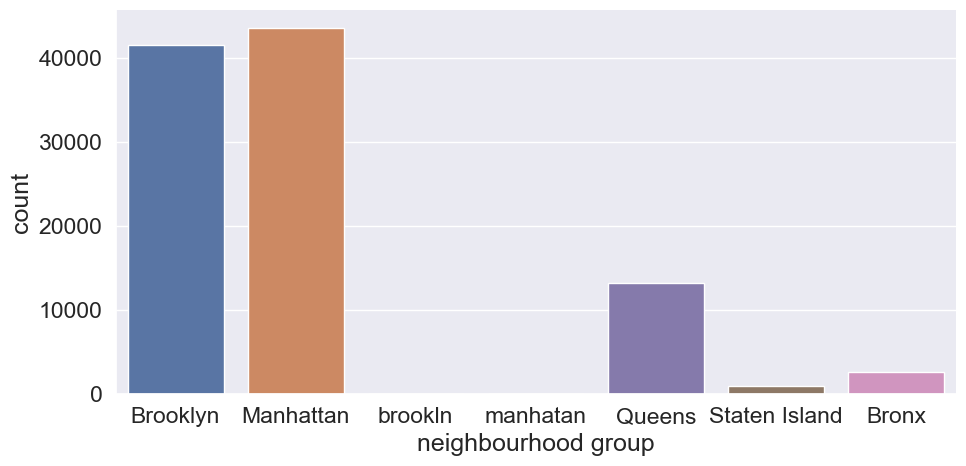

In [379]:
plot_catplot("neighbourhood group","count", 5, 2)

In [380]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

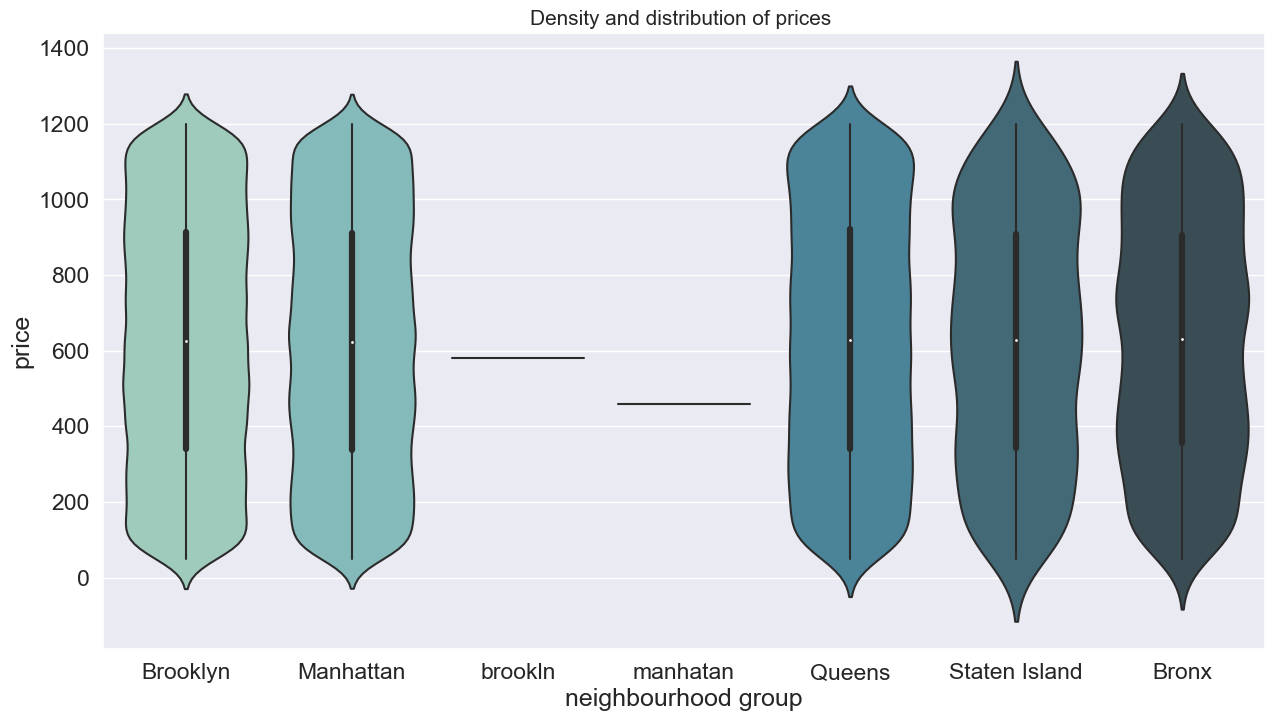

In [381]:
plot_violinplot("neighbourhood group","price")

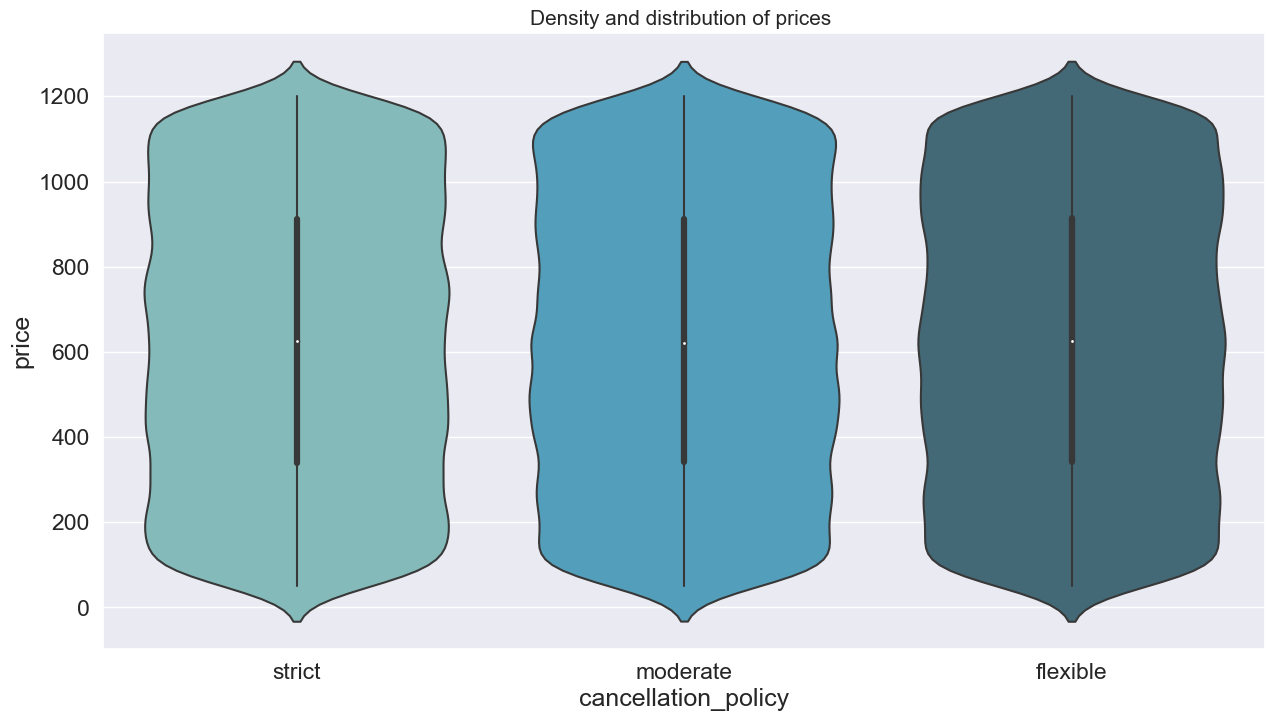

In [382]:
plot_violinplot("cancellation_policy","price")

## Categorical relation

In [383]:
# Selecting categorical columns for encoding
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'room type', 'instant_bookable', 'cancellation_policy']

In [384]:
# Applying one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first') # drop='first' to avoid multicollinearity
encoded_data = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_data.columns = onehot_encoder.get_feature_names_out(categorical_columns)

/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [385]:
# Dropping original categorical columns and adding encoded columns
#data_fe variable created for feature engineering the cleaned data
data_fe = df.drop(columns=categorical_columns)
data_fe = pd.concat([data_fe, encoded_data], axis=1)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood                   101811 non-null  object 
 1   host_identity_verified          101811 non-null  object 
 2   neighbourhood group             101811 non-null  object 
 3   lat                             101811 non-null  float64
 4   long                            101811 non-null  float64
 5   country                         101811 non-null  object 
 6   country code                    101811 non-null  object 
 7   instant_bookable                101811 non-null  bool   
 8   cancellation_policy             101811 non-null  object 
 9   room type                       101811 non-null  object 
 10  Construction year               101811 non-null  float64
 11  price                           101811 non-null  float64
 12  minimum nights  

In [389]:
# Dropping all non numeric categorical columns
non_num_columns = ['country code', 'neighbourhood', 'country', 'house_rules']
data_fe = data_fe.drop(columns=non_num_columns,axis=1)
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lat                                101811 non-null  float64
 1   long                               101811 non-null  float64
 2   Construction year                  101811 non-null  float64
 3   price                              101811 non-null  float64
 4   minimum nights                     101811 non-null  float64
 5   number of reviews                  101811 non-null  float64
 6   reviews per month                  101811 non-null  float64
 7   review rate number                 101811 non-null  float64
 8   calculated host listings count     101811 non-null  float64
 9   availability 365                   101811 non-null  float64
 10  price_per_night                    101811 non-null  float64
 11  host_identity_verified_verified    1018

## Second Method

In [140]:
# # Dropping all non numeric categorical columns
# non_num_columns = ['country code', 'neighbourhood', 'country', 'house_rules']
# data_fe = data_fe.drop(columns=non_num_columns,axis=1)
# data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101811 entries, 0 to 101810
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lat                                101811 non-null  float64
 1   long                               101811 non-null  float64
 2   Construction year                  101811 non-null  float64
 3   price                              101811 non-null  float64
 4   minimum nights                     101811 non-null  float64
 5   number of reviews                  101811 non-null  float64
 6   reviews per month                  101811 non-null  float64
 7   review rate number                 101811 non-null  float64
 8   calculated host listings count     101811 non-null  float64
 9   availability 365                   101811 non-null  float64
 10  price_per_night                    101811 non-null  float64
 11  host_identity_verified_verified    1018

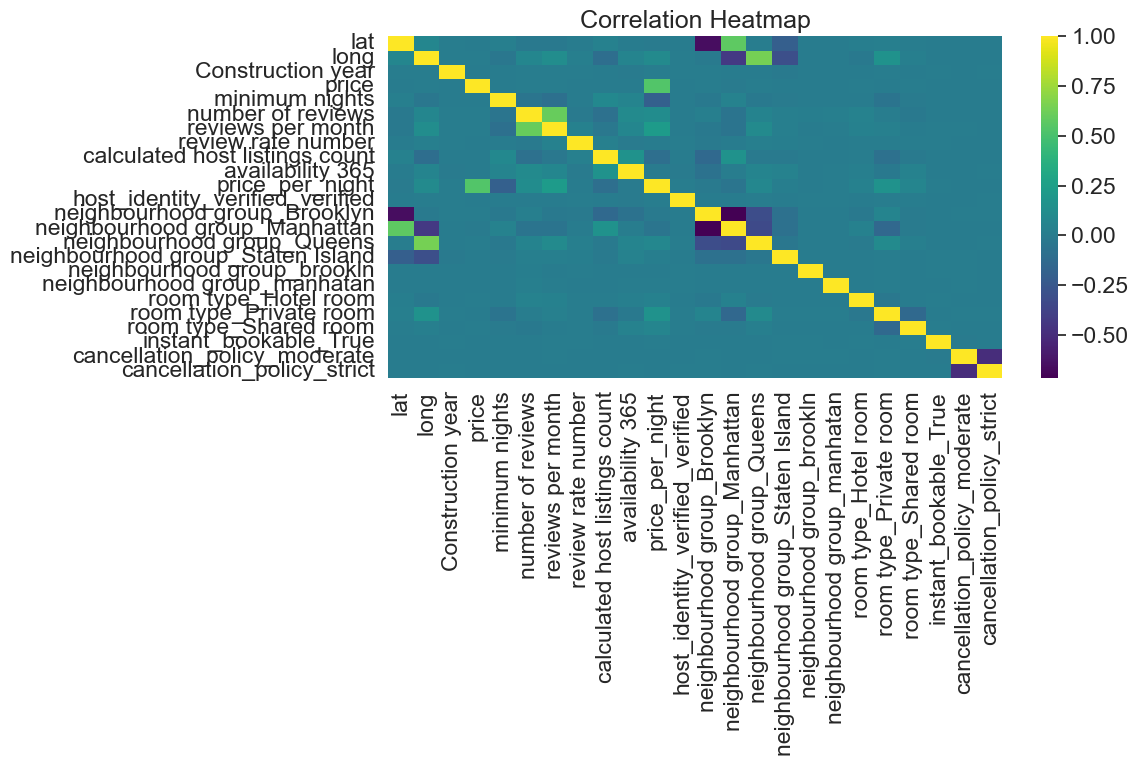

In [390]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_fe.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [142]:
# X = data_fe.drop('price', axis=1)
# y = data_fe['price']

In [143]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
# # Checking the shape of the split datasets
# split_shapes = {
#     "Training Features": X_train.shape,
#     "Training Labels": y_train.shape,
#     "Testing Features": X_test.shape,
#     "Testing Labels": y_test.shape
# }

# split_shapes

{'Training Features': (71267, 23),
 'Training Labels': (71267,),
 'Testing Features': (30544, 23),
 'Testing Labels': (30544,)}

In [146]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# import numpy as np

# # Create a pipeline with StandardScaler and LinearRegression
# lr_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features
#     ('linear_regression', LinearRegression())
# ])

# # Fit the pipeline on the training data
# lr_pipeline.fit(X_train, y_train)

# # Predict on the test set
# y_pred_lr = lr_pipeline.predict(X_test)


# mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
# mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
# rmse_lr = np.sqrt(mse_lr)
# r2_lr = metrics.r2_score(y_test, y_pred_lr)

# # Print the results
# print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
# print('Mean Squared Error of Linear Regression      : ', mse_lr)
# print('Root Mean Squared Error of Linear Regression : ', rmse_lr)
# print('R2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  230.2223306520797
Mean Squared Error of Linear Regression      :  74717.51268823603
Root Mean Squared Error of Linear Regression :  273.3450432845564
R2 Score of Linear Regression                :  0.31914147796339265


In [149]:
# # Applying Decision Tree Regression
# decision_tree_reg = DecisionTreeRegressor(random_state=101)
# decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [151]:
# y_pred_decision_tree = decision_tree_reg.predict(X_test)

In [152]:
# # Evaluating the model
# mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
# r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# mse_decision_tree, r2_decision_tree

(86.48471058145626, 0.999211913645052)

## First Method

In [343]:
categorical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [276]:
categorical_col

['NAME',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'service fee',
 'last review',
 'house_rules',
 'license']

In [277]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

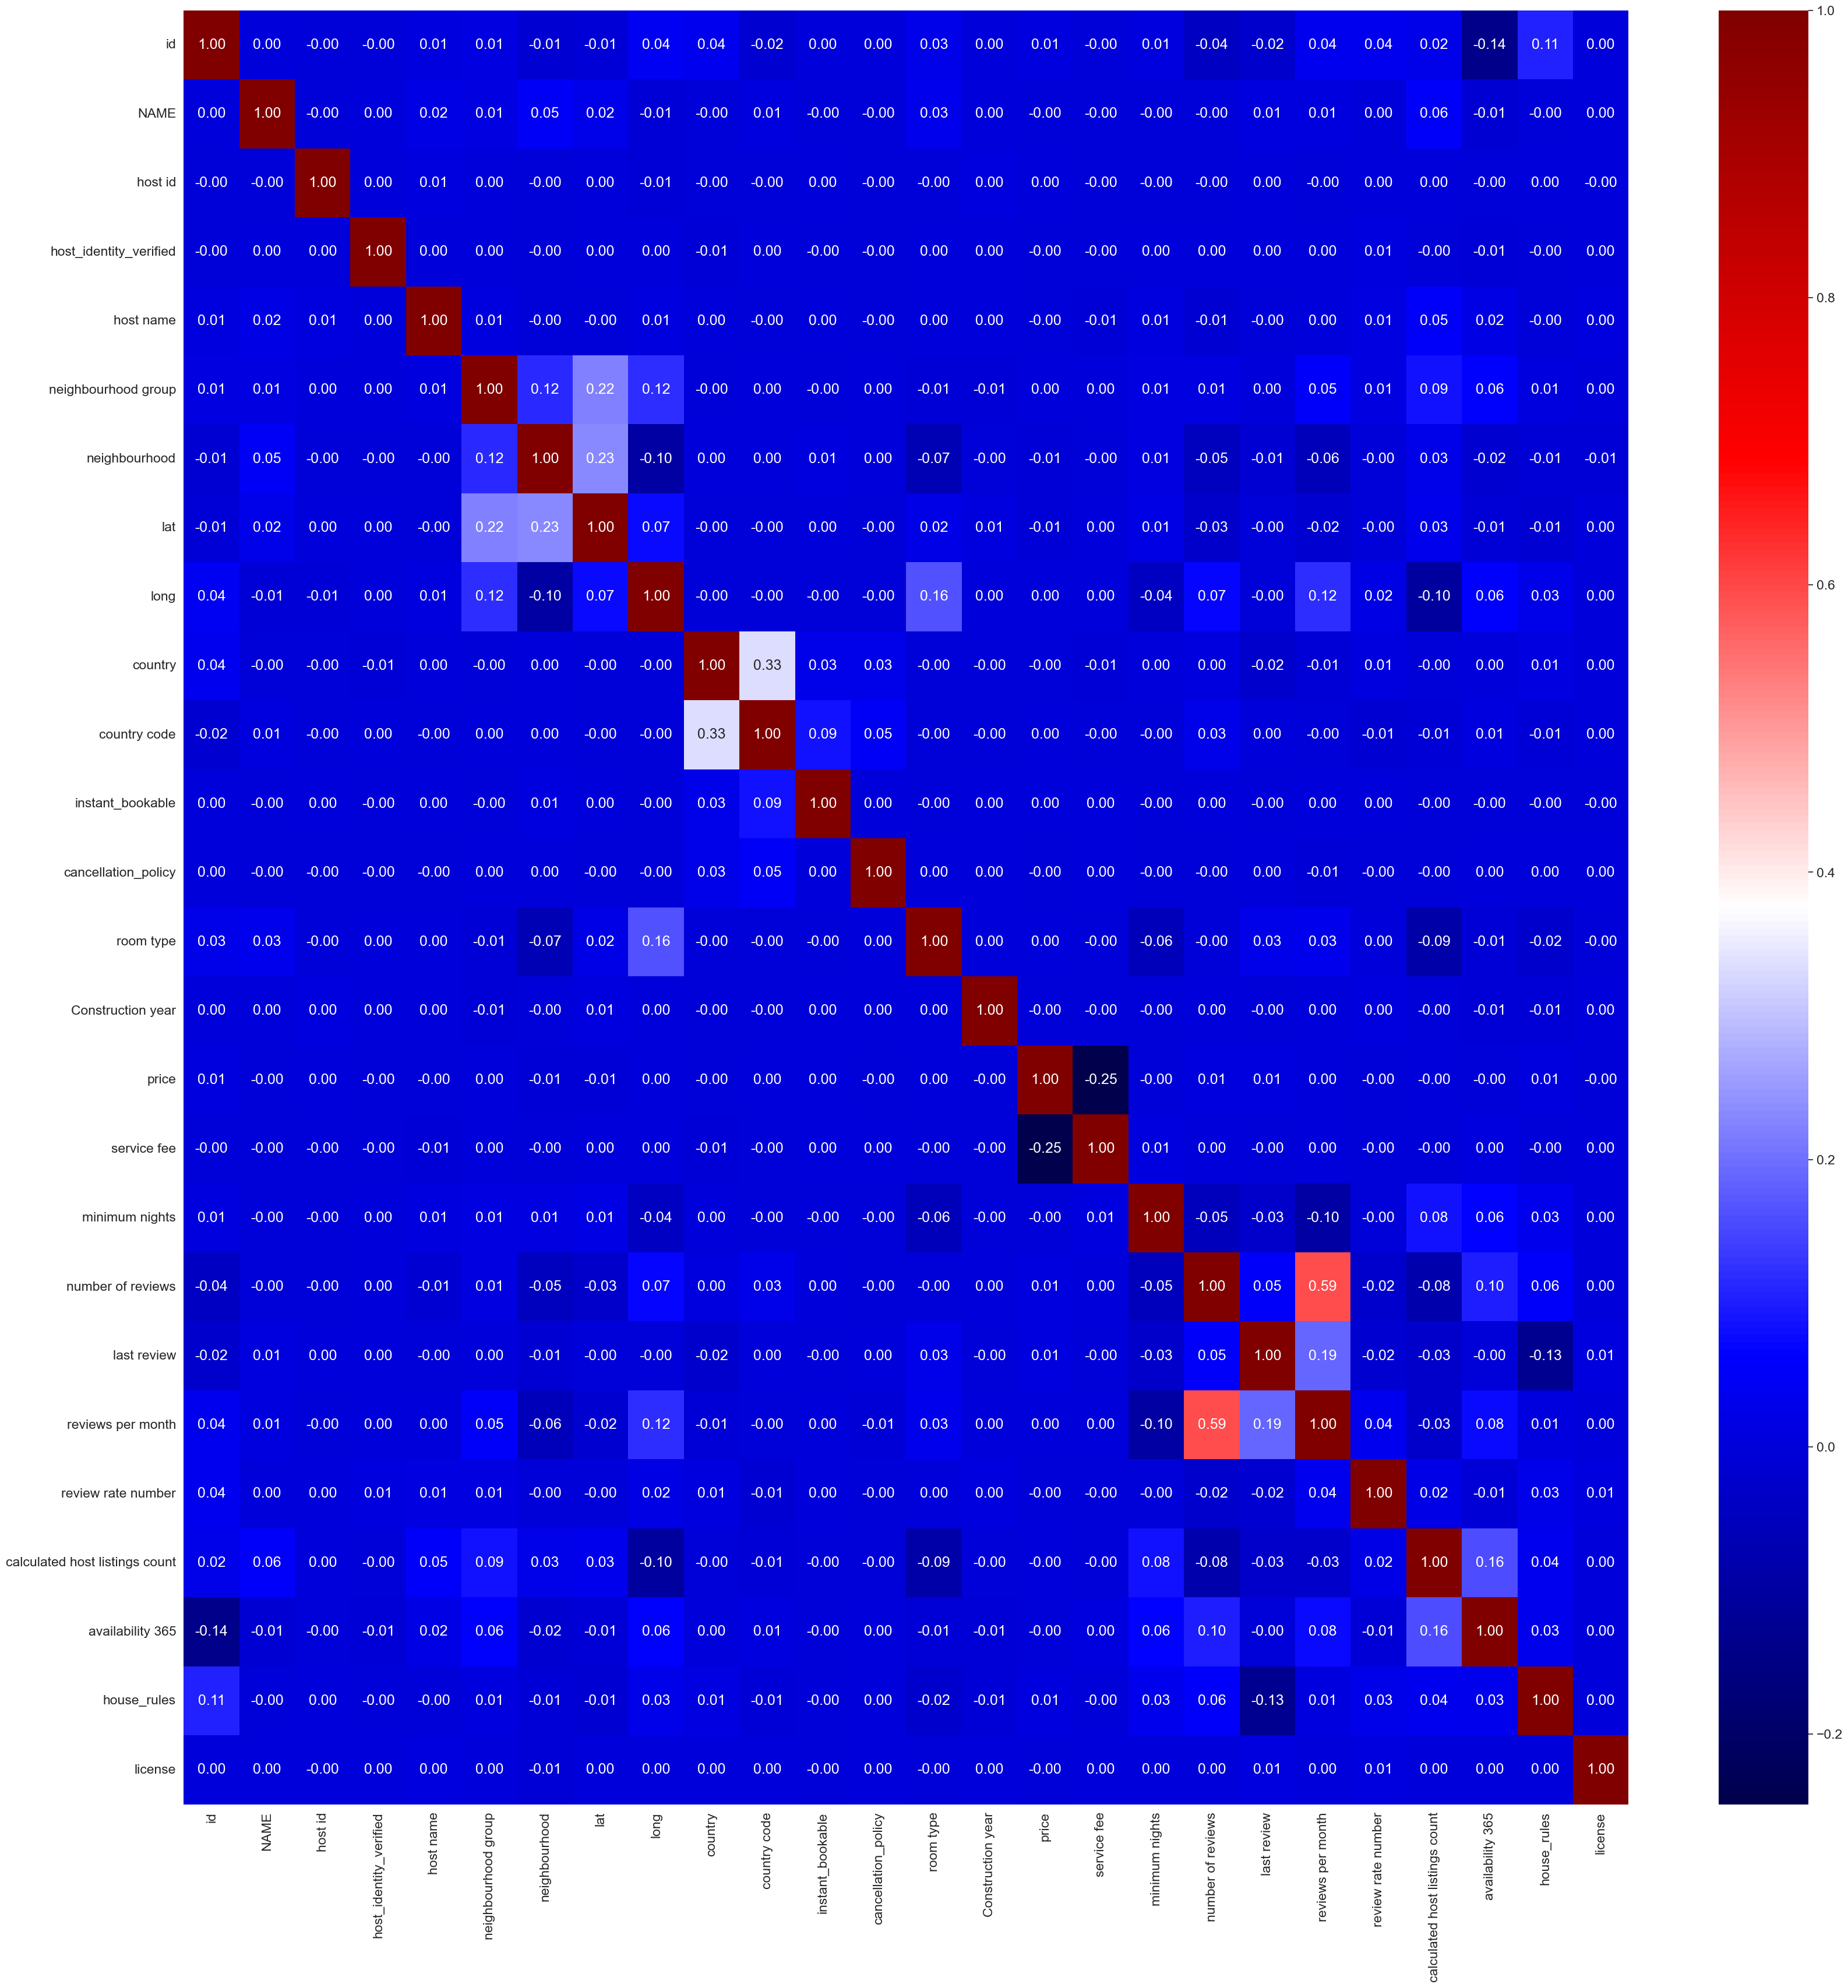

In [278]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [279]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [280]:
#First Method

df = df.dropna()
x = df.drop(["id","NAME","price","last review","house_rules","neighbourhood", "country code"],axis = 1)
y = df.price


In [391]:
#second Method
# Defining the target variable and features
x = data_fe.drop('price', axis=1)
y = data_fe['price']

## Model Selection

In [392]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101, seed = 123)

In [393]:
x_train

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_per_night,...,neighbourhood group_Queens,neighbourhood group_Staten Island,neighbourhood group_brookln,neighbourhood group_manhatan,room type_Hotel room,room type_Private room,room type_Shared room,instant_bookable_True,cancellation_policy_moderate,cancellation_policy_strict
78593,40.80113,-73.95287,2008.0,4.0,35.0,1.24,5.0,1.0,0.0,204.250000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15712,40.70555,-74.00812,2008.0,30.0,1.0,0.03,4.0,96.0,371.0,33.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31983,40.70498,-73.90023,2020.0,2.0,47.0,3.47,4.0,3.0,95.0,404.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65477,40.73877,-73.92557,2012.0,1.0,285.0,2.35,2.0,1.0,1.0,1001.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60635,40.73774,-73.90887,2009.0,30.0,4.0,1.22,2.0,4.0,358.0,31.200000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,40.62864,-73.89265,2016.0,2.0,11.0,0.22,5.0,2.0,335.0,450.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
73542,40.75608,-73.90535,2014.0,3.0,23.0,1.49,2.0,1.0,354.0,304.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
83281,40.80012,-73.94549,2007.0,4.0,7.0,0.33,4.0,1.0,0.0,248.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
83467,40.65853,-73.98301,2010.0,2.0,54.0,3.56,3.0,1.0,135.0,543.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [394]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Create a pipeline with StandardScaler and LinearRegression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
lr_pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred_lr = lr_pipeline.predict(x_test)


mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = metrics.r2_score(y_test, y_pred_lr)

# Print the results
print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('Mean Squared Error of Linear Regression      : ', mse_lr)
print('Root Mean Squared Error of Linear Regression : ', rmse_lr)
print('R2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  229.21603243699616
Mean Squared Error of Linear Regression      :  73936.85910160237
Root Mean Squared Error of Linear Regression :  271.91333012855836
R2 Score of Linear Regression                :  0.3285144330209212


In [395]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)



Mean Absolute Error of Random Forest Regressor     :  0.49333300594214646

Mean Squarred Error of Random Forest Regressor     :  42.74494806266267

Root Mean Squarred Error of Random Forest Regressor:  6.5379620725928556

R2 Score of Random Forest Regressor                :  0.9996117955775494


In [1]:
#A value of 0.493 is very low, suggesting that, on average, your predictions are very close to the actual values.


In [396]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)
#abs r2 score

/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.50308e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.4618e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.45582e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.45655e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda

/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.3138e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.79728e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.02668e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.80804e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/akkothari/anaconda


Mean Absolute Error of Polynomial Regression     :  4.256234005867542e-09

Mean Squarred Error of Polynomial Regression     :  2.704505986471892e-17

Root Mean Squarred Error of Polynomial Regression:  5.200486502695581e-09

R2 Score of Polynomial Regression                :  1.0


/Users/akkothari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.9653e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [397]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.082054
0:	learn: 314.2661021	total: 33.5ms	remaining: 33.4s
1:	learn: 298.9027274	total: 41.8ms	remaining: 20.9s
2:	learn: 285.0572061	total: 45.9ms	remaining: 15.2s
3:	learn: 270.2459945	total: 49ms	remaining: 12.2s
4:	learn: 257.6368481	total: 52.1ms	remaining: 10.4s
5:	learn: 245.6271722	total: 55.1ms	remaining: 9.13s
6:	learn: 233.6238994	total: 58ms	remaining: 8.22s
7:	learn: 221.9424570	total: 60.9ms	remaining: 7.55s
8:	learn: 211.4728668	total: 63.8ms	remaining: 7.03s
9:	learn: 202.4481150	total: 67ms	remaining: 6.63s
10:	learn: 194.1647748	total: 69.9ms	remaining: 6.28s
11:	learn: 185.8917161	total: 72.5ms	remaining: 5.97s
12:	learn: 178.1137590	total: 75.3ms	remaining: 5.72s
13:	learn: 171.1831659	total: 78.1ms	remaining: 5.5s
14:	learn: 164.6567822	total: 81ms	remaining: 5.32s
15:	learn: 158.5825673	total: 83.8ms	remaining: 5.15s
16:	learn: 152.4596783	total: 86.7ms	remaining: 5.01s
17:	learn: 146.8528070	total: 89.5ms	remaining: 4.88s
18:	learn: 141.88

181:	learn: 19.6503373	total: 546ms	remaining: 2.45s
182:	learn: 19.6353764	total: 549ms	remaining: 2.45s
183:	learn: 19.4168817	total: 552ms	remaining: 2.45s
184:	learn: 19.2786930	total: 556ms	remaining: 2.45s
185:	learn: 19.2076447	total: 559ms	remaining: 2.45s
186:	learn: 19.1845927	total: 562ms	remaining: 2.44s
187:	learn: 19.1342667	total: 565ms	remaining: 2.44s
188:	learn: 18.9564382	total: 568ms	remaining: 2.44s
189:	learn: 18.7881212	total: 572ms	remaining: 2.44s
190:	learn: 18.7418116	total: 575ms	remaining: 2.44s
191:	learn: 18.7236368	total: 578ms	remaining: 2.43s
192:	learn: 18.7172075	total: 581ms	remaining: 2.43s
193:	learn: 18.6731444	total: 584ms	remaining: 2.42s
194:	learn: 18.4668836	total: 587ms	remaining: 2.42s
195:	learn: 18.4638619	total: 589ms	remaining: 2.42s
196:	learn: 18.2803619	total: 592ms	remaining: 2.41s
197:	learn: 18.2656859	total: 595ms	remaining: 2.41s
198:	learn: 18.1078530	total: 599ms	remaining: 2.41s
199:	learn: 18.0488858	total: 602ms	remaining:

340:	learn: 12.1925974	total: 1.02s	remaining: 1.98s
341:	learn: 12.1751181	total: 1.03s	remaining: 1.97s
342:	learn: 12.1726672	total: 1.03s	remaining: 1.97s
343:	learn: 12.1356661	total: 1.03s	remaining: 1.97s
344:	learn: 12.0835748	total: 1.03s	remaining: 1.97s
345:	learn: 12.0600464	total: 1.04s	remaining: 1.96s
346:	learn: 11.9915164	total: 1.04s	remaining: 1.96s
347:	learn: 11.9547827	total: 1.04s	remaining: 1.96s
348:	learn: 11.9386127	total: 1.05s	remaining: 1.96s
349:	learn: 11.8935187	total: 1.05s	remaining: 1.95s
350:	learn: 11.8767047	total: 1.05s	remaining: 1.95s
351:	learn: 11.8700381	total: 1.06s	remaining: 1.95s
352:	learn: 11.8483440	total: 1.06s	remaining: 1.94s
353:	learn: 11.8455166	total: 1.06s	remaining: 1.94s
354:	learn: 11.8085325	total: 1.06s	remaining: 1.94s
355:	learn: 11.8060743	total: 1.07s	remaining: 1.93s
356:	learn: 11.7909356	total: 1.07s	remaining: 1.93s
357:	learn: 11.7771406	total: 1.07s	remaining: 1.93s
358:	learn: 11.7700662	total: 1.08s	remaining:

512:	learn: 9.3675675	total: 1.53s	remaining: 1.46s
513:	learn: 9.3339326	total: 1.54s	remaining: 1.45s
514:	learn: 9.3259649	total: 1.54s	remaining: 1.45s
515:	learn: 9.3229735	total: 1.54s	remaining: 1.45s
516:	learn: 9.3182390	total: 1.55s	remaining: 1.44s
517:	learn: 9.3126890	total: 1.55s	remaining: 1.44s
518:	learn: 9.3082417	total: 1.55s	remaining: 1.44s
519:	learn: 9.2880756	total: 1.55s	remaining: 1.44s
520:	learn: 9.2876186	total: 1.56s	remaining: 1.43s
521:	learn: 9.2830664	total: 1.56s	remaining: 1.43s
522:	learn: 9.2587055	total: 1.56s	remaining: 1.43s
523:	learn: 9.2489371	total: 1.57s	remaining: 1.42s
524:	learn: 9.2483404	total: 1.57s	remaining: 1.42s
525:	learn: 9.2416119	total: 1.57s	remaining: 1.42s
526:	learn: 9.2336718	total: 1.57s	remaining: 1.41s
527:	learn: 9.2257361	total: 1.58s	remaining: 1.41s
528:	learn: 9.2232949	total: 1.58s	remaining: 1.41s
529:	learn: 9.2185636	total: 1.58s	remaining: 1.4s
530:	learn: 9.2170151	total: 1.59s	remaining: 1.4s
531:	learn: 9.

677:	learn: 7.9476001	total: 2.02s	remaining: 957ms
678:	learn: 7.9459171	total: 2.02s	remaining: 954ms
679:	learn: 7.9440486	total: 2.02s	remaining: 951ms
680:	learn: 7.9406420	total: 2.02s	remaining: 948ms
681:	learn: 7.9351963	total: 2.03s	remaining: 945ms
682:	learn: 7.9327407	total: 2.03s	remaining: 942ms
683:	learn: 7.9315184	total: 2.03s	remaining: 939ms
684:	learn: 7.9303940	total: 2.04s	remaining: 936ms
685:	learn: 7.9244283	total: 2.04s	remaining: 933ms
686:	learn: 7.9196390	total: 2.04s	remaining: 930ms
687:	learn: 7.9101528	total: 2.04s	remaining: 927ms
688:	learn: 7.9068294	total: 2.05s	remaining: 924ms
689:	learn: 7.8989786	total: 2.05s	remaining: 921ms
690:	learn: 7.8971751	total: 2.05s	remaining: 918ms
691:	learn: 7.8929941	total: 2.06s	remaining: 915ms
692:	learn: 7.8863269	total: 2.06s	remaining: 912ms
693:	learn: 7.8840266	total: 2.06s	remaining: 909ms
694:	learn: 7.8695271	total: 2.06s	remaining: 906ms
695:	learn: 7.8643325	total: 2.07s	remaining: 903ms
696:	learn: 

853:	learn: 6.9552649	total: 2.53s	remaining: 432ms
854:	learn: 6.9522585	total: 2.53s	remaining: 429ms
855:	learn: 6.9483194	total: 2.53s	remaining: 426ms
856:	learn: 6.9450987	total: 2.54s	remaining: 423ms
857:	learn: 6.9382498	total: 2.54s	remaining: 420ms
858:	learn: 6.9338562	total: 2.54s	remaining: 417ms
859:	learn: 6.9308200	total: 2.55s	remaining: 414ms
860:	learn: 6.9273524	total: 2.55s	remaining: 412ms
861:	learn: 6.9236328	total: 2.55s	remaining: 409ms
862:	learn: 6.9180307	total: 2.56s	remaining: 406ms
863:	learn: 6.9131324	total: 2.56s	remaining: 403ms
864:	learn: 6.9100903	total: 2.56s	remaining: 400ms
865:	learn: 6.9071355	total: 2.56s	remaining: 397ms
866:	learn: 6.8976543	total: 2.57s	remaining: 394ms
867:	learn: 6.8964915	total: 2.57s	remaining: 391ms
868:	learn: 6.8854912	total: 2.57s	remaining: 388ms
869:	learn: 6.8811343	total: 2.58s	remaining: 385ms
870:	learn: 6.8744483	total: 2.58s	remaining: 382ms
871:	learn: 6.8704155	total: 2.58s	remaining: 379ms
872:	learn: 

48:	learn: 67.2394138	total: 134ms	remaining: 2.6s
49:	learn: 66.1013960	total: 137ms	remaining: 2.6s
50:	learn: 65.0071754	total: 139ms	remaining: 2.59s
51:	learn: 63.9571918	total: 142ms	remaining: 2.59s
52:	learn: 63.1299633	total: 144ms	remaining: 2.58s
53:	learn: 62.1117954	total: 147ms	remaining: 2.58s
54:	learn: 61.4133735	total: 150ms	remaining: 2.57s
55:	learn: 60.5765587	total: 152ms	remaining: 2.56s
56:	learn: 59.0432391	total: 155ms	remaining: 2.56s
57:	learn: 58.2047245	total: 158ms	remaining: 2.56s
58:	learn: 56.9221788	total: 161ms	remaining: 2.56s
59:	learn: 56.3185947	total: 163ms	remaining: 2.56s
60:	learn: 55.5065815	total: 166ms	remaining: 2.55s
61:	learn: 54.2643534	total: 169ms	remaining: 2.55s
62:	learn: 53.6523117	total: 171ms	remaining: 2.54s
63:	learn: 52.5398409	total: 174ms	remaining: 2.54s
64:	learn: 52.0430568	total: 176ms	remaining: 2.54s
65:	learn: 51.0993373	total: 179ms	remaining: 2.53s
66:	learn: 50.6487456	total: 182ms	remaining: 2.53s
67:	learn: 49.

231:	learn: 18.2375315	total: 611ms	remaining: 2.02s
232:	learn: 18.0651447	total: 613ms	remaining: 2.02s
233:	learn: 18.0041176	total: 616ms	remaining: 2.02s
234:	learn: 17.8284775	total: 619ms	remaining: 2.01s
235:	learn: 17.6789975	total: 621ms	remaining: 2.01s
236:	learn: 17.5404445	total: 624ms	remaining: 2.01s
237:	learn: 17.5047972	total: 627ms	remaining: 2.01s
238:	learn: 17.4900866	total: 630ms	remaining: 2s
239:	learn: 17.4854297	total: 632ms	remaining: 2s
240:	learn: 17.4374387	total: 635ms	remaining: 2s
241:	learn: 17.4329546	total: 638ms	remaining: 2s
242:	learn: 17.3163731	total: 641ms	remaining: 2s
243:	learn: 17.2861981	total: 643ms	remaining: 1.99s
244:	learn: 17.2180609	total: 646ms	remaining: 1.99s
245:	learn: 17.2136319	total: 648ms	remaining: 1.99s
246:	learn: 17.1793084	total: 651ms	remaining: 1.98s
247:	learn: 17.1750922	total: 654ms	remaining: 1.98s
248:	learn: 17.1708925	total: 656ms	remaining: 1.98s
249:	learn: 17.1668565	total: 659ms	remaining: 1.98s
250:	lea

426:	learn: 10.6109855	total: 1.12s	remaining: 1.51s
427:	learn: 10.6039461	total: 1.13s	remaining: 1.5s
428:	learn: 10.5956224	total: 1.13s	remaining: 1.5s
429:	learn: 10.5787495	total: 1.13s	remaining: 1.5s
430:	learn: 10.5663464	total: 1.13s	remaining: 1.5s
431:	learn: 10.5644533	total: 1.14s	remaining: 1.49s
432:	learn: 10.5626635	total: 1.14s	remaining: 1.49s
433:	learn: 10.5588869	total: 1.14s	remaining: 1.49s
434:	learn: 10.5508692	total: 1.14s	remaining: 1.49s
435:	learn: 10.5186891	total: 1.15s	remaining: 1.48s
436:	learn: 10.4778611	total: 1.15s	remaining: 1.48s
437:	learn: 10.4490133	total: 1.15s	remaining: 1.48s
438:	learn: 10.4408506	total: 1.15s	remaining: 1.48s
439:	learn: 10.4163372	total: 1.16s	remaining: 1.47s
440:	learn: 10.3783748	total: 1.16s	remaining: 1.47s
441:	learn: 10.3540050	total: 1.16s	remaining: 1.47s
442:	learn: 10.3418002	total: 1.17s	remaining: 1.47s
443:	learn: 10.3070532	total: 1.17s	remaining: 1.46s
444:	learn: 10.2821041	total: 1.17s	remaining: 1.4

604:	learn: 8.4496994	total: 1.6s	remaining: 1.05s
605:	learn: 8.4434834	total: 1.6s	remaining: 1.04s
606:	learn: 8.4362891	total: 1.61s	remaining: 1.04s
607:	learn: 8.4329572	total: 1.61s	remaining: 1.04s
608:	learn: 8.4258190	total: 1.61s	remaining: 1.03s
609:	learn: 8.4188707	total: 1.61s	remaining: 1.03s
610:	learn: 8.4149516	total: 1.62s	remaining: 1.03s
611:	learn: 8.4081186	total: 1.62s	remaining: 1.03s
612:	learn: 8.3945580	total: 1.62s	remaining: 1.02s
613:	learn: 8.3775573	total: 1.63s	remaining: 1.02s
614:	learn: 8.3618237	total: 1.63s	remaining: 1.02s
615:	learn: 8.3582662	total: 1.63s	remaining: 1.02s
616:	learn: 8.3546940	total: 1.63s	remaining: 1.01s
617:	learn: 8.3468103	total: 1.64s	remaining: 1.01s
618:	learn: 8.3446081	total: 1.64s	remaining: 1.01s
619:	learn: 8.3381274	total: 1.64s	remaining: 1.01s
620:	learn: 8.3318910	total: 1.65s	remaining: 1s
621:	learn: 8.3289481	total: 1.65s	remaining: 1s
622:	learn: 8.3267549	total: 1.65s	remaining: 999ms
623:	learn: 8.313794

794:	learn: 7.0303724	total: 2.12s	remaining: 546ms
795:	learn: 7.0230631	total: 2.12s	remaining: 544ms
796:	learn: 7.0180628	total: 2.13s	remaining: 541ms
797:	learn: 7.0111393	total: 2.13s	remaining: 539ms
798:	learn: 7.0076723	total: 2.13s	remaining: 536ms
799:	learn: 7.0036103	total: 2.13s	remaining: 534ms
800:	learn: 6.9970947	total: 2.14s	remaining: 531ms
801:	learn: 6.9942132	total: 2.14s	remaining: 528ms
802:	learn: 6.9872545	total: 2.14s	remaining: 526ms
803:	learn: 6.9800316	total: 2.15s	remaining: 523ms
804:	learn: 6.9774553	total: 2.15s	remaining: 521ms
805:	learn: 6.9707854	total: 2.15s	remaining: 518ms
806:	learn: 6.9630819	total: 2.16s	remaining: 516ms
807:	learn: 6.9590330	total: 2.16s	remaining: 513ms
808:	learn: 6.9566924	total: 2.16s	remaining: 511ms
809:	learn: 6.9538929	total: 2.17s	remaining: 508ms
810:	learn: 6.9515860	total: 2.17s	remaining: 506ms
811:	learn: 6.9464453	total: 2.17s	remaining: 503ms
812:	learn: 6.9448415	total: 2.17s	remaining: 500ms
813:	learn: 

987:	learn: 6.2152065	total: 2.71s	remaining: 32.9ms
988:	learn: 6.2103704	total: 2.71s	remaining: 30.2ms
989:	learn: 6.2066814	total: 2.72s	remaining: 27.5ms
990:	learn: 6.2045135	total: 2.72s	remaining: 24.7ms
991:	learn: 6.2001000	total: 2.72s	remaining: 22ms
992:	learn: 6.1963643	total: 2.73s	remaining: 19.2ms
993:	learn: 6.1944153	total: 2.73s	remaining: 16.5ms
994:	learn: 6.1915978	total: 2.73s	remaining: 13.7ms
995:	learn: 6.1886157	total: 2.74s	remaining: 11ms
996:	learn: 6.1833998	total: 2.74s	remaining: 8.24ms
997:	learn: 6.1810828	total: 2.74s	remaining: 5.5ms
998:	learn: 6.1705406	total: 2.75s	remaining: 2.75ms
999:	learn: 6.1692694	total: 2.75s	remaining: 0us
Learning rate set to 0.079211
0:	learn: 316.3105765	total: 4.12ms	remaining: 4.11s
1:	learn: 300.6309999	total: 7.27ms	remaining: 3.63s
2:	learn: 286.7632840	total: 10.6ms	remaining: 3.52s
3:	learn: 274.0640403	total: 13.6ms	remaining: 3.39s
4:	learn: 261.0743061	total: 16.8ms	remaining: 3.35s
5:	learn: 249.2563394	to

145:	learn: 24.2193661	total: 403ms	remaining: 2.36s
146:	learn: 24.1397177	total: 405ms	remaining: 2.35s
147:	learn: 24.1167778	total: 408ms	remaining: 2.35s
148:	learn: 23.7711634	total: 411ms	remaining: 2.35s
149:	learn: 23.6636678	total: 414ms	remaining: 2.34s
150:	learn: 23.3221164	total: 416ms	remaining: 2.34s
151:	learn: 23.1947095	total: 419ms	remaining: 2.34s
152:	learn: 23.1787552	total: 422ms	remaining: 2.34s
153:	learn: 23.1530559	total: 425ms	remaining: 2.33s
154:	learn: 23.0578654	total: 427ms	remaining: 2.33s
155:	learn: 22.8191198	total: 430ms	remaining: 2.33s
156:	learn: 22.7359709	total: 432ms	remaining: 2.32s
157:	learn: 22.4150380	total: 435ms	remaining: 2.32s
158:	learn: 22.3481714	total: 437ms	remaining: 2.31s
159:	learn: 22.2070630	total: 440ms	remaining: 2.31s
160:	learn: 22.1917800	total: 442ms	remaining: 2.31s
161:	learn: 22.1693266	total: 445ms	remaining: 2.3s
162:	learn: 21.9151696	total: 448ms	remaining: 2.3s
163:	learn: 21.8393824	total: 450ms	remaining: 2

338:	learn: 11.7903106	total: 918ms	remaining: 1.79s
339:	learn: 11.7884148	total: 921ms	remaining: 1.79s
340:	learn: 11.7508390	total: 924ms	remaining: 1.78s
341:	learn: 11.7410356	total: 926ms	remaining: 1.78s
342:	learn: 11.7140101	total: 929ms	remaining: 1.78s
343:	learn: 11.6875119	total: 931ms	remaining: 1.78s
344:	learn: 11.6842779	total: 934ms	remaining: 1.77s
345:	learn: 11.6686262	total: 937ms	remaining: 1.77s
346:	learn: 11.6523264	total: 940ms	remaining: 1.77s
347:	learn: 11.6499983	total: 942ms	remaining: 1.76s
348:	learn: 11.6335383	total: 945ms	remaining: 1.76s
349:	learn: 11.6164249	total: 947ms	remaining: 1.76s
350:	learn: 11.6146759	total: 950ms	remaining: 1.76s
351:	learn: 11.6105096	total: 953ms	remaining: 1.75s
352:	learn: 11.5564828	total: 956ms	remaining: 1.75s
353:	learn: 11.5393444	total: 958ms	remaining: 1.75s
354:	learn: 11.4852597	total: 961ms	remaining: 1.75s
355:	learn: 11.4372319	total: 964ms	remaining: 1.74s
356:	learn: 11.4089650	total: 967ms	remaining:

507:	learn: 8.9675496	total: 1.39s	remaining: 1.35s
508:	learn: 8.9582510	total: 1.39s	remaining: 1.34s
509:	learn: 8.9479909	total: 1.4s	remaining: 1.34s
510:	learn: 8.9263583	total: 1.4s	remaining: 1.34s
511:	learn: 8.9234473	total: 1.4s	remaining: 1.33s
512:	learn: 8.9207682	total: 1.4s	remaining: 1.33s
513:	learn: 8.9053481	total: 1.41s	remaining: 1.33s
514:	learn: 8.9039365	total: 1.41s	remaining: 1.33s
515:	learn: 8.8951852	total: 1.41s	remaining: 1.32s
516:	learn: 8.8876629	total: 1.41s	remaining: 1.32s
517:	learn: 8.8863714	total: 1.42s	remaining: 1.32s
518:	learn: 8.8784546	total: 1.42s	remaining: 1.32s
519:	learn: 8.8708727	total: 1.42s	remaining: 1.31s
520:	learn: 8.8488709	total: 1.43s	remaining: 1.31s
521:	learn: 8.8264834	total: 1.43s	remaining: 1.31s
522:	learn: 8.8250617	total: 1.43s	remaining: 1.31s
523:	learn: 8.8238057	total: 1.43s	remaining: 1.3s
524:	learn: 8.8188990	total: 1.44s	remaining: 1.3s
525:	learn: 8.8176081	total: 1.44s	remaining: 1.3s
526:	learn: 8.80159

697:	learn: 7.4408334	total: 1.91s	remaining: 825ms
698:	learn: 7.4283946	total: 1.91s	remaining: 823ms
699:	learn: 7.4241335	total: 1.91s	remaining: 820ms
700:	learn: 7.4233806	total: 1.92s	remaining: 817ms
701:	learn: 7.4183128	total: 1.92s	remaining: 814ms
702:	learn: 7.4157150	total: 1.92s	remaining: 812ms
703:	learn: 7.4108320	total: 1.92s	remaining: 809ms
704:	learn: 7.3999732	total: 1.93s	remaining: 806ms
705:	learn: 7.3941091	total: 1.93s	remaining: 804ms
706:	learn: 7.3849515	total: 1.93s	remaining: 801ms
707:	learn: 7.3829548	total: 1.94s	remaining: 798ms
708:	learn: 7.3750889	total: 1.94s	remaining: 795ms
709:	learn: 7.3741148	total: 1.94s	remaining: 793ms
710:	learn: 7.3703135	total: 1.94s	remaining: 790ms
711:	learn: 7.3605954	total: 1.95s	remaining: 787ms
712:	learn: 7.3504515	total: 1.95s	remaining: 784ms
713:	learn: 7.3476719	total: 1.95s	remaining: 781ms
714:	learn: 7.3394222	total: 1.95s	remaining: 779ms
715:	learn: 7.3352868	total: 1.96s	remaining: 776ms
716:	learn: 

871:	learn: 6.4974673	total: 2.38s	remaining: 350ms
872:	learn: 6.4968509	total: 2.38s	remaining: 347ms
873:	learn: 6.4947192	total: 2.39s	remaining: 344ms
874:	learn: 6.4925478	total: 2.39s	remaining: 341ms
875:	learn: 6.4900231	total: 2.39s	remaining: 339ms
876:	learn: 6.4834482	total: 2.39s	remaining: 336ms
877:	learn: 6.4817886	total: 2.4s	remaining: 333ms
878:	learn: 6.4751361	total: 2.4s	remaining: 330ms
879:	learn: 6.4730633	total: 2.4s	remaining: 328ms
880:	learn: 6.4621277	total: 2.41s	remaining: 325ms
881:	learn: 6.4581839	total: 2.41s	remaining: 322ms
882:	learn: 6.4580299	total: 2.41s	remaining: 319ms
883:	learn: 6.4547998	total: 2.41s	remaining: 317ms
884:	learn: 6.4541461	total: 2.42s	remaining: 314ms
885:	learn: 6.4532666	total: 2.42s	remaining: 311ms
886:	learn: 6.4504354	total: 2.42s	remaining: 308ms
887:	learn: 6.4467414	total: 2.42s	remaining: 306ms
888:	learn: 6.4420563	total: 2.43s	remaining: 303ms
889:	learn: 6.4392059	total: 2.43s	remaining: 300ms
890:	learn: 6.4

56:	learn: 59.4349137	total: 149ms	remaining: 2.47s
57:	learn: 58.4225917	total: 152ms	remaining: 2.47s
58:	learn: 57.1908990	total: 155ms	remaining: 2.47s
59:	learn: 56.0775330	total: 158ms	remaining: 2.47s
60:	learn: 55.4592786	total: 160ms	remaining: 2.46s
61:	learn: 54.2795201	total: 163ms	remaining: 2.46s
62:	learn: 53.7827869	total: 165ms	remaining: 2.46s
63:	learn: 52.6347446	total: 168ms	remaining: 2.46s
64:	learn: 51.7148089	total: 171ms	remaining: 2.46s
65:	learn: 50.7182658	total: 174ms	remaining: 2.46s
66:	learn: 49.8673288	total: 177ms	remaining: 2.46s
67:	learn: 49.1149070	total: 179ms	remaining: 2.46s
68:	learn: 48.5090777	total: 182ms	remaining: 2.45s
69:	learn: 48.0774588	total: 184ms	remaining: 2.44s
70:	learn: 47.3145260	total: 187ms	remaining: 2.44s
71:	learn: 46.7007980	total: 189ms	remaining: 2.44s
72:	learn: 46.2869049	total: 192ms	remaining: 2.44s
73:	learn: 45.9608813	total: 194ms	remaining: 2.43s
74:	learn: 45.1251205	total: 197ms	remaining: 2.43s
75:	learn: 4

235:	learn: 16.3306220	total: 623ms	remaining: 2.02s
236:	learn: 16.3269247	total: 626ms	remaining: 2.01s
237:	learn: 16.2804434	total: 628ms	remaining: 2.01s
238:	learn: 16.2688832	total: 631ms	remaining: 2.01s
239:	learn: 16.1810683	total: 634ms	remaining: 2.01s
240:	learn: 16.1742757	total: 636ms	remaining: 2s
241:	learn: 16.1709975	total: 639ms	remaining: 2s
242:	learn: 16.0359182	total: 642ms	remaining: 2s
243:	learn: 15.9967092	total: 644ms	remaining: 2s
244:	learn: 15.9519815	total: 647ms	remaining: 1.99s
245:	learn: 15.9487982	total: 649ms	remaining: 1.99s
246:	learn: 15.9354613	total: 652ms	remaining: 1.99s
247:	learn: 15.9324547	total: 654ms	remaining: 1.98s
248:	learn: 15.9202751	total: 657ms	remaining: 1.98s
249:	learn: 15.9164028	total: 659ms	remaining: 1.98s
250:	learn: 15.8588871	total: 662ms	remaining: 1.98s
251:	learn: 15.7424108	total: 665ms	remaining: 1.97s
252:	learn: 15.7387165	total: 667ms	remaining: 1.97s
253:	learn: 15.6975815	total: 670ms	remaining: 1.97s
254:	

434:	learn: 10.4439534	total: 1.14s	remaining: 1.48s
435:	learn: 10.4267605	total: 1.14s	remaining: 1.48s
436:	learn: 10.4084460	total: 1.15s	remaining: 1.48s
437:	learn: 10.3927398	total: 1.15s	remaining: 1.47s
438:	learn: 10.3587956	total: 1.15s	remaining: 1.47s
439:	learn: 10.3187575	total: 1.16s	remaining: 1.47s
440:	learn: 10.3039825	total: 1.16s	remaining: 1.47s
441:	learn: 10.2634070	total: 1.16s	remaining: 1.47s
442:	learn: 10.2517277	total: 1.16s	remaining: 1.46s
443:	learn: 10.2217969	total: 1.17s	remaining: 1.46s
444:	learn: 10.1927974	total: 1.17s	remaining: 1.46s
445:	learn: 10.1701671	total: 1.17s	remaining: 1.46s
446:	learn: 10.1619217	total: 1.17s	remaining: 1.45s
447:	learn: 10.1438083	total: 1.18s	remaining: 1.45s
448:	learn: 10.1388876	total: 1.18s	remaining: 1.45s
449:	learn: 10.1129985	total: 1.18s	remaining: 1.45s
450:	learn: 10.0974481	total: 1.18s	remaining: 1.44s
451:	learn: 10.0646200	total: 1.19s	remaining: 1.44s
452:	learn: 10.0359192	total: 1.19s	remaining:

615:	learn: 8.2099752	total: 1.61s	remaining: 1.01s
616:	learn: 8.2022800	total: 1.62s	remaining: 1s
617:	learn: 8.1894857	total: 1.62s	remaining: 1s
618:	learn: 8.1832842	total: 1.62s	remaining: 999ms
619:	learn: 8.1734669	total: 1.63s	remaining: 996ms
620:	learn: 8.1673543	total: 1.63s	remaining: 994ms
621:	learn: 8.1625317	total: 1.63s	remaining: 991ms
622:	learn: 8.1554285	total: 1.63s	remaining: 988ms
623:	learn: 8.1551487	total: 1.64s	remaining: 986ms
624:	learn: 8.1500823	total: 1.64s	remaining: 983ms
625:	learn: 8.1495923	total: 1.64s	remaining: 980ms
626:	learn: 8.1412586	total: 1.64s	remaining: 977ms
627:	learn: 8.1291384	total: 1.65s	remaining: 975ms
628:	learn: 8.1167351	total: 1.65s	remaining: 972ms
629:	learn: 8.1163934	total: 1.65s	remaining: 970ms
630:	learn: 8.1113888	total: 1.65s	remaining: 967ms
631:	learn: 8.1103690	total: 1.66s	remaining: 964ms
632:	learn: 8.0974001	total: 1.66s	remaining: 962ms
633:	learn: 8.0901420	total: 1.66s	remaining: 959ms
634:	learn: 8.0863

811:	learn: 6.9599531	total: 2.13s	remaining: 494ms
812:	learn: 6.9500325	total: 2.13s	remaining: 491ms
813:	learn: 6.9463039	total: 2.14s	remaining: 489ms
814:	learn: 6.9344188	total: 2.14s	remaining: 486ms
815:	learn: 6.9294044	total: 2.14s	remaining: 483ms
816:	learn: 6.9263944	total: 2.15s	remaining: 481ms
817:	learn: 6.9183419	total: 2.15s	remaining: 478ms
818:	learn: 6.9166340	total: 2.15s	remaining: 476ms
819:	learn: 6.9116871	total: 2.15s	remaining: 473ms
820:	learn: 6.9077670	total: 2.16s	remaining: 470ms
821:	learn: 6.9015255	total: 2.16s	remaining: 468ms
822:	learn: 6.8928549	total: 2.16s	remaining: 465ms
823:	learn: 6.8908688	total: 2.17s	remaining: 463ms
824:	learn: 6.8874602	total: 2.17s	remaining: 460ms
825:	learn: 6.8836532	total: 2.17s	remaining: 457ms
826:	learn: 6.8817745	total: 2.17s	remaining: 455ms
827:	learn: 6.8752455	total: 2.17s	remaining: 452ms
828:	learn: 6.8697269	total: 2.18s	remaining: 449ms
829:	learn: 6.8663037	total: 2.18s	remaining: 447ms
830:	learn: 

989:	learn: 6.1946202	total: 2.61s	remaining: 26.3ms
990:	learn: 6.1888165	total: 2.61s	remaining: 23.7ms
991:	learn: 6.1845365	total: 2.61s	remaining: 21.1ms
992:	learn: 6.1825077	total: 2.62s	remaining: 18.4ms
993:	learn: 6.1766409	total: 2.62s	remaining: 15.8ms
994:	learn: 6.1728375	total: 2.62s	remaining: 13.2ms
995:	learn: 6.1684507	total: 2.63s	remaining: 10.5ms
996:	learn: 6.1666967	total: 2.63s	remaining: 7.91ms
997:	learn: 6.1621700	total: 2.63s	remaining: 5.27ms
998:	learn: 6.1563886	total: 2.63s	remaining: 2.64ms
999:	learn: 6.1516728	total: 2.64s	remaining: 0us
Learning rate set to 0.079211
0:	learn: 314.8658836	total: 3.58ms	remaining: 3.57s
1:	learn: 299.9986687	total: 5.9ms	remaining: 2.94s
2:	learn: 286.5509360	total: 8.56ms	remaining: 2.85s
3:	learn: 272.1677814	total: 11.3ms	remaining: 2.83s
4:	learn: 259.8291295	total: 14.1ms	remaining: 2.8s
5:	learn: 248.0850584	total: 16.8ms	remaining: 2.77s
6:	learn: 236.3749536	total: 19.9ms	remaining: 2.82s
7:	learn: 224.7569304

173:	learn: 22.4335645	total: 460ms	remaining: 2.19s
174:	learn: 22.0569001	total: 463ms	remaining: 2.18s
175:	learn: 21.9484461	total: 465ms	remaining: 2.18s
176:	learn: 21.8920515	total: 468ms	remaining: 2.18s
177:	learn: 21.6264079	total: 471ms	remaining: 2.17s
178:	learn: 21.4051500	total: 474ms	remaining: 2.17s
179:	learn: 21.1570538	total: 476ms	remaining: 2.17s
180:	learn: 21.1099509	total: 479ms	remaining: 2.17s
181:	learn: 21.0601412	total: 482ms	remaining: 2.17s
182:	learn: 21.0548224	total: 485ms	remaining: 2.16s
183:	learn: 21.0509944	total: 487ms	remaining: 2.16s
184:	learn: 20.9804029	total: 489ms	remaining: 2.15s
185:	learn: 20.8162334	total: 492ms	remaining: 2.15s
186:	learn: 20.8057089	total: 495ms	remaining: 2.15s
187:	learn: 20.5796413	total: 498ms	remaining: 2.15s
188:	learn: 20.5214982	total: 500ms	remaining: 2.15s
189:	learn: 20.4471374	total: 503ms	remaining: 2.14s
190:	learn: 20.4434807	total: 505ms	remaining: 2.14s
191:	learn: 20.3848092	total: 507ms	remaining:

344:	learn: 12.1274106	total: 932ms	remaining: 1.77s
345:	learn: 12.0900071	total: 935ms	remaining: 1.77s
346:	learn: 12.0823002	total: 938ms	remaining: 1.76s
347:	learn: 12.0683708	total: 941ms	remaining: 1.76s
348:	learn: 12.0648201	total: 944ms	remaining: 1.76s
349:	learn: 12.0473395	total: 946ms	remaining: 1.76s
350:	learn: 12.0262837	total: 949ms	remaining: 1.75s
351:	learn: 11.9519277	total: 952ms	remaining: 1.75s
352:	learn: 11.9310302	total: 955ms	remaining: 1.75s
353:	learn: 11.8732324	total: 958ms	remaining: 1.75s
354:	learn: 11.8372077	total: 961ms	remaining: 1.75s
355:	learn: 11.8337765	total: 964ms	remaining: 1.74s
356:	learn: 11.8304838	total: 966ms	remaining: 1.74s
357:	learn: 11.7798069	total: 970ms	remaining: 1.74s
358:	learn: 11.7614108	total: 972ms	remaining: 1.74s
359:	learn: 11.7490721	total: 975ms	remaining: 1.73s
360:	learn: 11.7354089	total: 978ms	remaining: 1.73s
361:	learn: 11.7204417	total: 982ms	remaining: 1.73s
362:	learn: 11.7155406	total: 985ms	remaining:

533:	learn: 9.0492927	total: 1.45s	remaining: 1.26s
534:	learn: 9.0447024	total: 1.45s	remaining: 1.26s
535:	learn: 9.0317061	total: 1.46s	remaining: 1.26s
536:	learn: 9.0150532	total: 1.46s	remaining: 1.26s
537:	learn: 9.0085076	total: 1.46s	remaining: 1.25s
538:	learn: 9.0041008	total: 1.46s	remaining: 1.25s
539:	learn: 9.0030917	total: 1.47s	remaining: 1.25s
540:	learn: 8.9941218	total: 1.47s	remaining: 1.25s
541:	learn: 8.9765559	total: 1.47s	remaining: 1.24s
542:	learn: 8.9556751	total: 1.47s	remaining: 1.24s
543:	learn: 8.9362274	total: 1.48s	remaining: 1.24s
544:	learn: 8.9349269	total: 1.48s	remaining: 1.24s
545:	learn: 8.9339680	total: 1.48s	remaining: 1.23s
546:	learn: 8.9198169	total: 1.49s	remaining: 1.23s
547:	learn: 8.8989647	total: 1.49s	remaining: 1.23s
548:	learn: 8.8977641	total: 1.49s	remaining: 1.22s
549:	learn: 8.8869799	total: 1.49s	remaining: 1.22s
550:	learn: 8.8712760	total: 1.5s	remaining: 1.22s
551:	learn: 8.8622579	total: 1.5s	remaining: 1.22s
552:	learn: 8.

711:	learn: 7.6079952	total: 1.92s	remaining: 777ms
712:	learn: 7.6054238	total: 1.92s	remaining: 774ms
713:	learn: 7.5980933	total: 1.93s	remaining: 772ms
714:	learn: 7.5873441	total: 1.93s	remaining: 769ms
715:	learn: 7.5794320	total: 1.93s	remaining: 766ms
716:	learn: 7.5767657	total: 1.93s	remaining: 764ms
717:	learn: 7.5721080	total: 1.94s	remaining: 761ms
718:	learn: 7.5638504	total: 1.94s	remaining: 758ms
719:	learn: 7.5511188	total: 1.94s	remaining: 756ms
720:	learn: 7.5388823	total: 1.95s	remaining: 753ms
721:	learn: 7.5288733	total: 1.95s	remaining: 750ms
722:	learn: 7.5149675	total: 1.95s	remaining: 748ms
723:	learn: 7.5141045	total: 1.95s	remaining: 745ms
724:	learn: 7.5132772	total: 1.96s	remaining: 742ms
725:	learn: 7.5071563	total: 1.96s	remaining: 740ms
726:	learn: 7.4971458	total: 1.96s	remaining: 737ms
727:	learn: 7.4901981	total: 1.96s	remaining: 734ms
728:	learn: 7.4789726	total: 1.97s	remaining: 732ms
729:	learn: 7.4771047	total: 1.97s	remaining: 729ms
730:	learn: 

905:	learn: 6.6480950	total: 2.44s	remaining: 254ms
906:	learn: 6.6407133	total: 2.45s	remaining: 251ms
907:	learn: 6.6391454	total: 2.45s	remaining: 248ms
908:	learn: 6.6356049	total: 2.45s	remaining: 245ms
909:	learn: 6.6316311	total: 2.45s	remaining: 243ms
910:	learn: 6.6261815	total: 2.46s	remaining: 240ms
911:	learn: 6.6243275	total: 2.46s	remaining: 237ms
912:	learn: 6.6169444	total: 2.46s	remaining: 235ms
913:	learn: 6.6113463	total: 2.47s	remaining: 232ms
914:	learn: 6.6089628	total: 2.47s	remaining: 229ms
915:	learn: 6.6079046	total: 2.47s	remaining: 227ms
916:	learn: 6.6054979	total: 2.47s	remaining: 224ms
917:	learn: 6.5988557	total: 2.48s	remaining: 221ms
918:	learn: 6.5930894	total: 2.48s	remaining: 219ms
919:	learn: 6.5880141	total: 2.48s	remaining: 216ms
920:	learn: 6.5850819	total: 2.48s	remaining: 213ms
921:	learn: 6.5810908	total: 2.49s	remaining: 210ms
922:	learn: 6.5752370	total: 2.49s	remaining: 208ms
923:	learn: 6.5716284	total: 2.49s	remaining: 205ms
924:	learn: 

71:	learn: 48.2718349	total: 195ms	remaining: 2.51s
72:	learn: 47.7272990	total: 197ms	remaining: 2.5s
73:	learn: 47.3166030	total: 200ms	remaining: 2.5s
74:	learn: 46.7790552	total: 202ms	remaining: 2.5s
75:	learn: 46.5016535	total: 205ms	remaining: 2.49s
76:	learn: 46.2607067	total: 207ms	remaining: 2.49s
77:	learn: 45.8753976	total: 210ms	remaining: 2.48s
78:	learn: 44.7733731	total: 213ms	remaining: 2.48s
79:	learn: 44.0527550	total: 216ms	remaining: 2.48s
80:	learn: 43.6250887	total: 218ms	remaining: 2.48s
81:	learn: 43.3930353	total: 221ms	remaining: 2.47s
82:	learn: 42.7113378	total: 224ms	remaining: 2.47s
83:	learn: 41.8688318	total: 226ms	remaining: 2.47s
84:	learn: 41.6634693	total: 229ms	remaining: 2.46s
85:	learn: 40.8867668	total: 232ms	remaining: 2.46s
86:	learn: 40.5940815	total: 234ms	remaining: 2.46s
87:	learn: 40.4024482	total: 236ms	remaining: 2.45s
88:	learn: 39.4301929	total: 239ms	remaining: 2.45s
89:	learn: 38.7467242	total: 242ms	remaining: 2.45s
90:	learn: 38.5

257:	learn: 16.0273133	total: 709ms	remaining: 2.04s
258:	learn: 15.9915307	total: 712ms	remaining: 2.04s
259:	learn: 15.9695983	total: 715ms	remaining: 2.04s
260:	learn: 15.9304269	total: 718ms	remaining: 2.03s
261:	learn: 15.9084677	total: 721ms	remaining: 2.03s
262:	learn: 15.8561177	total: 724ms	remaining: 2.03s
263:	learn: 15.8365255	total: 727ms	remaining: 2.03s
264:	learn: 15.7997325	total: 730ms	remaining: 2.02s
265:	learn: 15.7757972	total: 733ms	remaining: 2.02s
266:	learn: 15.7074713	total: 736ms	remaining: 2.02s
267:	learn: 15.6108018	total: 740ms	remaining: 2.02s
268:	learn: 15.5997000	total: 742ms	remaining: 2.02s
269:	learn: 15.5226277	total: 746ms	remaining: 2.02s
270:	learn: 15.4778930	total: 749ms	remaining: 2.01s
271:	learn: 15.3605289	total: 752ms	remaining: 2.01s
272:	learn: 15.3498137	total: 755ms	remaining: 2.01s
273:	learn: 15.2287167	total: 759ms	remaining: 2.01s
274:	learn: 15.1535839	total: 762ms	remaining: 2.01s
275:	learn: 15.1141933	total: 765ms	remaining:

413:	learn: 10.9324922	total: 1.18s	remaining: 1.67s
414:	learn: 10.9178430	total: 1.19s	remaining: 1.67s
415:	learn: 10.9126837	total: 1.19s	remaining: 1.67s
416:	learn: 10.9002833	total: 1.19s	remaining: 1.67s
417:	learn: 10.8594634	total: 1.2s	remaining: 1.66s
418:	learn: 10.8508096	total: 1.2s	remaining: 1.66s
419:	learn: 10.8436528	total: 1.2s	remaining: 1.66s
420:	learn: 10.8308408	total: 1.2s	remaining: 1.66s
421:	learn: 10.8156569	total: 1.21s	remaining: 1.65s
422:	learn: 10.8043528	total: 1.21s	remaining: 1.65s
423:	learn: 10.7725532	total: 1.21s	remaining: 1.65s
424:	learn: 10.7629178	total: 1.22s	remaining: 1.64s
425:	learn: 10.7534770	total: 1.22s	remaining: 1.64s
426:	learn: 10.7373689	total: 1.22s	remaining: 1.64s
427:	learn: 10.7296428	total: 1.22s	remaining: 1.64s
428:	learn: 10.7215094	total: 1.23s	remaining: 1.63s
429:	learn: 10.7163038	total: 1.23s	remaining: 1.63s
430:	learn: 10.6845500	total: 1.23s	remaining: 1.63s
431:	learn: 10.6462732	total: 1.23s	remaining: 1.6

597:	learn: 8.7985439	total: 1.7s	remaining: 1.14s
598:	learn: 8.7950015	total: 1.7s	remaining: 1.14s
599:	learn: 8.7701280	total: 1.7s	remaining: 1.13s
600:	learn: 8.7632875	total: 1.71s	remaining: 1.13s
601:	learn: 8.7592311	total: 1.71s	remaining: 1.13s
602:	learn: 8.7507361	total: 1.71s	remaining: 1.13s
603:	learn: 8.7464785	total: 1.72s	remaining: 1.12s
604:	learn: 8.7375823	total: 1.72s	remaining: 1.12s
605:	learn: 8.7338827	total: 1.72s	remaining: 1.12s
606:	learn: 8.7175610	total: 1.72s	remaining: 1.12s
607:	learn: 8.7146118	total: 1.73s	remaining: 1.11s
608:	learn: 8.7130427	total: 1.73s	remaining: 1.11s
609:	learn: 8.7110042	total: 1.74s	remaining: 1.11s
610:	learn: 8.7032616	total: 1.74s	remaining: 1.11s
611:	learn: 8.6836679	total: 1.74s	remaining: 1.1s
612:	learn: 8.6604892	total: 1.75s	remaining: 1.1s
613:	learn: 8.6518261	total: 1.75s	remaining: 1.1s
614:	learn: 8.6472355	total: 1.75s	remaining: 1.1s
615:	learn: 8.6344569	total: 1.76s	remaining: 1.09s
616:	learn: 8.62973

788:	learn: 7.3614578	total: 2.29s	remaining: 612ms
789:	learn: 7.3599483	total: 2.29s	remaining: 609ms
790:	learn: 7.3446611	total: 2.29s	remaining: 606ms
791:	learn: 7.3445684	total: 2.3s	remaining: 603ms
792:	learn: 7.3411039	total: 2.3s	remaining: 601ms
793:	learn: 7.3323458	total: 2.3s	remaining: 598ms
794:	learn: 7.3303055	total: 2.31s	remaining: 595ms
795:	learn: 7.3236906	total: 2.31s	remaining: 592ms
796:	learn: 7.3182137	total: 2.31s	remaining: 589ms
797:	learn: 7.3165373	total: 2.31s	remaining: 586ms
798:	learn: 7.3132636	total: 2.32s	remaining: 583ms
799:	learn: 7.3113889	total: 2.32s	remaining: 580ms
800:	learn: 7.3112975	total: 2.32s	remaining: 577ms
801:	learn: 7.3065228	total: 2.33s	remaining: 574ms
802:	learn: 7.2984032	total: 2.33s	remaining: 571ms
803:	learn: 7.2983137	total: 2.33s	remaining: 568ms
804:	learn: 7.2982279	total: 2.33s	remaining: 565ms
805:	learn: 7.2980293	total: 2.34s	remaining: 562ms
806:	learn: 7.2855031	total: 2.34s	remaining: 560ms
807:	learn: 7.2

950:	learn: 6.5482506	total: 2.76s	remaining: 142ms
951:	learn: 6.5409866	total: 2.77s	remaining: 140ms
952:	learn: 6.5338986	total: 2.77s	remaining: 137ms
953:	learn: 6.5316074	total: 2.77s	remaining: 134ms
954:	learn: 6.5268517	total: 2.78s	remaining: 131ms
955:	learn: 6.5240173	total: 2.78s	remaining: 128ms
956:	learn: 6.5227250	total: 2.78s	remaining: 125ms
957:	learn: 6.5222695	total: 2.78s	remaining: 122ms
958:	learn: 6.5220368	total: 2.79s	remaining: 119ms
959:	learn: 6.5148548	total: 2.79s	remaining: 116ms
960:	learn: 6.5128150	total: 2.79s	remaining: 113ms
961:	learn: 6.5073326	total: 2.8s	remaining: 110ms
962:	learn: 6.5023774	total: 2.8s	remaining: 108ms
963:	learn: 6.4994222	total: 2.8s	remaining: 105ms
964:	learn: 6.4960075	total: 2.81s	remaining: 102ms
965:	learn: 6.4947885	total: 2.81s	remaining: 98.8ms
966:	learn: 6.4904205	total: 2.81s	remaining: 95.9ms
967:	learn: 6.4883242	total: 2.81s	remaining: 93ms
968:	learn: 6.4831728	total: 2.82s	remaining: 90.1ms
969:	learn: 6

In [398]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  27.053227193544387

Mean Squarred Error of Gradient Boosting     :  1577.0262240875843

Root Mean Squarred Error of Gradient Boosting:  39.711789484831634

R2 Score of Gradient Boosting                :  0.9856776395279769


In [399]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  4.870358825051901

Mean Squarred Error of XGBoost Regressor     :  86.99789304646288

Root Mean Squarred Error of XGBoost Regressor:  9.327266107840114

R2 Score of XGBoost Regressor                :  0.9992098957103653


In [400]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}

In [404]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [405]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.328514,2.292160e+02,7.393686e+04,2.719133e+02
Random Forest,0.999612,4.933330e-01,4.274495e+01,6.537962e+00
Polynomial Regression,1.000000,4.256234e-09,2.704506e-17,5.200487e-09
CatBoost,0.999162,5.014953e+00,9.228757e+01,9.606642e+00
Gradient Boosting,0.985678,2.705323e+01,1.577026e+03,3.971179e+01
XGBoost,0.999210,4.870359e+00,8.699789e+01,9.327266e+00


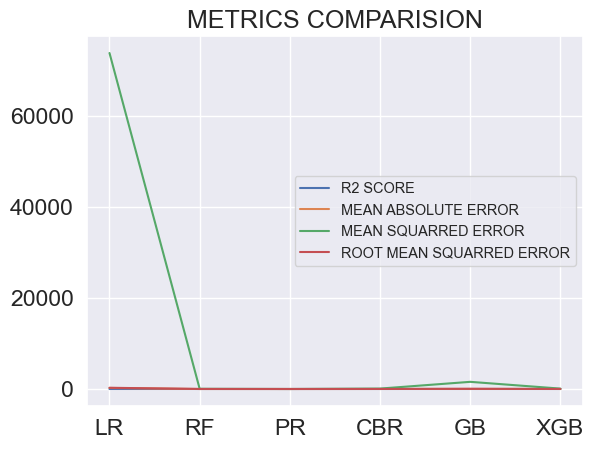

In [406]:
alg = ['LR','RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

        50.0       1.00      0.86      0.93        22
        51.0       1.00      0.91      0.95        11
        52.0       0.94      0.83      0.88        18
        53.0       0.89      1.00      0.94         8
        54.0       1.00      0.91      0.95        11
        55.0       0.91      1.00      0.95        20
        56.0       0.76      0.93      0.84        14
        57.0       1.00      0.93      0.96        14
        58.0       1.00      0.95      0.97        20
        59.0       0.87      0.96      0.91        27
        60.0       1.00      0.85      0.92        20
        61.0       0.94      0.94      0.94        16
        62.0       0.81      1.00      0.90        13
        63.0       1.00      0.89      0.94        18
        64.0       1.00      0.83      0.91        12
        65.0       0.86      1.00      0.93        19
        66.0       0.82      0.93      0.87        15
        67.0